# **Chapter 11**
## *Additional Statistical Modeling Techniques for Time Series*, 

This chapter picks up picks up from Chapter 10, "Building Univariate Time Series Models Using Statistical Methods", diving into more advanced and practical models, such as vector autoregressive (VAR) for multivariate time series, generalized autoregressive conditional heteroskedasticity (GARCH) for forecasting volatility, and an introduction to the `Prophet` algorithm and library.


In this chapter, we will cover the following recipes:
* Forecasting time series data using auto_arima
* Forecasting time series data using Facebook Prophet
* Forecasting multivariate time series data using VAR
* Evaluating vector autoregressive (VAR) models
* Forecasting volatility in financial time series data with GARCH

# Technical Requirements


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.tools import diff
from pathlib import Path
import warnings

warnings.filterwarnings('ignore')
plt.rc("figure", figsize=(16, 5))

**Check installed versions**

In [2]:
import matplotlib 
import statsmodels as sm
import prophet
import arch
import pmdarima

print(f"""
matplotlib -> {matplotlib.__version__}
pandas -> {pd.__version__}   
numpy -> {np.__version__}
statsmodels -> {sm.__version__}
prophet -> {prophet.__version__}
arch -> {arch.__version__}
pmdarima -> {pmdarima.__version__}
""")


Matplotlib -> 3.7.1
pandas -> 2.0.0   
numpy -> 1.24.2
statsmodels -> 0.13.5
prophet -> 1.1.2
arch -> 5.4.0
pmdarima -> 2.0.3



In [3]:
###### configurations for image quality#######
plt.rcParams["figure.figsize"] = (12, 5)   ##
# plt.rcParams['figure.dpi'] = 300           ## 300 for printing
plt.rc('font', size=8)                     ## 
plt.rc('axes', titlesize=16)               ## 
plt.rc('axes', labelsize=14)               ##
plt.rc('xtick', labelsize=10)              ##
plt.rc('ytick', labelsize=10)              ##
plt.rc('legend', fontsize=10)              ##
plt.rc('figure', titlesize=12)             ## 
#############################################

# Recipe 1. Forecasting Time Series Data using Auto_ARIMA

You will need to install pmdarima before you can proceed with this recipe. 

* To install it using `pip`, use the following command:

In [4]:
!pip3 install -U pmdarima

You will use the milk_production.csv data used in Chapter 10, *Building Univariate Time Series Models Using Statistical Methods*. Recall that the data contains both trend and seasonality, so you will be training a SARIMA model.

In [5]:
import pmdarima as pm

In [6]:
milk = pd.read_csv('datasets/milk_production.csv', 
                   index_col='month', 
                   parse_dates=True)

In [7]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(milk, test_size=0.10, shuffle=False)
# same results using pmdarima
train, test = pm.model_selection.train_test_split(milk, test_size=0.10)

In [8]:
print(f'Train: {train.shape}')
print(f'Test: {test.shape}')

Train: (151, 1)
Test: (17, 1)


## How to do it

In [9]:
auto_model = pm.auto_arima(train, 
                           seasonal=True, 
                           m=12, 
                           test='adf',
                           stepwise=True)
auto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  151
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -475.008
Date:                            Mon, 17 Apr 2023   AIC                            956.016
Time:                                    15:45:58   BIC                            964.798
Sample:                                01-01-1962   HQIC                           959.585
                                     - 07-01-1974                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2714      0.082     -3.326      0.001      -0.431      -0.111
ma.S.L12      -0.6233      0.079     -7.908      0.000      -0.778      -0.469
sigma2        54.7638      5.498      9.960      0.000      43.987      65.540
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                31.78
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               1.22   Skew:                             0.74
Prob(H) (two-sided):                  0.50   Kurtosis:                         4.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [10]:
auto_model = pm.auto_arima(train, 
                           seasonal=True, 
                           m=12, 
                           test='adf', 
                           stepwise=True,
                           trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=961.878, Time=0.72 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1005.341, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=971.814, Time=0.08 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=956.016, Time=0.14 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=996.508, Time=0.04 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=957.982, Time=0.24 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=957.967, Time=0.40 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=971.938, Time=0.08 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=960.016, Time=0.44 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=964.474, Time=0.08 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=957.884, Time=0.20 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=957.783, Time=0.23 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=956.436, Time=0.14 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=959.701, Time=0.31 sec
 ARIMA(0,1,1)(0,1,1)[12] interce

In [11]:
auto_model = pm.auto_arima(train, 
                           seasonal=True, 
                           m=12, 
                           test='adf', 
                           information_criterion='bic',
                           stepwise=True,
                           trace=True)


Performing stepwise search to minimize bic
 ARIMA(2,1,2)(1,1,1)[12]             : BIC=982.369, Time=0.58 sec
 ARIMA(0,1,0)(0,1,0)[12]             : BIC=1008.269, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : BIC=980.596, Time=0.07 sec
 ARIMA(0,1,1)(0,1,1)[12]             : BIC=964.798, Time=0.17 sec
 ARIMA(0,1,1)(0,1,0)[12]             : BIC=1002.362, Time=0.04 sec
 ARIMA(0,1,1)(1,1,1)[12]             : BIC=969.691, Time=0.23 sec
 ARIMA(0,1,1)(0,1,2)[12]             : BIC=969.676, Time=0.42 sec
 ARIMA(0,1,1)(1,1,0)[12]             : BIC=980.720, Time=0.08 sec
 ARIMA(0,1,1)(1,1,2)[12]             : BIC=974.652, Time=0.50 sec
 ARIMA(0,1,0)(0,1,1)[12]             : BIC=970.329, Time=0.08 sec
 ARIMA(1,1,1)(0,1,1)[12]             : BIC=969.593, Time=0.18 sec
 ARIMA(0,1,2)(0,1,1)[12]             : BIC=969.493, Time=0.16 sec
 ARIMA(1,1,0)(0,1,1)[12]             : BIC=965.218, Time=0.14 sec
 ARIMA(1,1,2)(0,1,1)[12]             : BIC=974.337, Time=0.32 sec
 ARIMA(0,1,1)(0,1,1)[12] interc

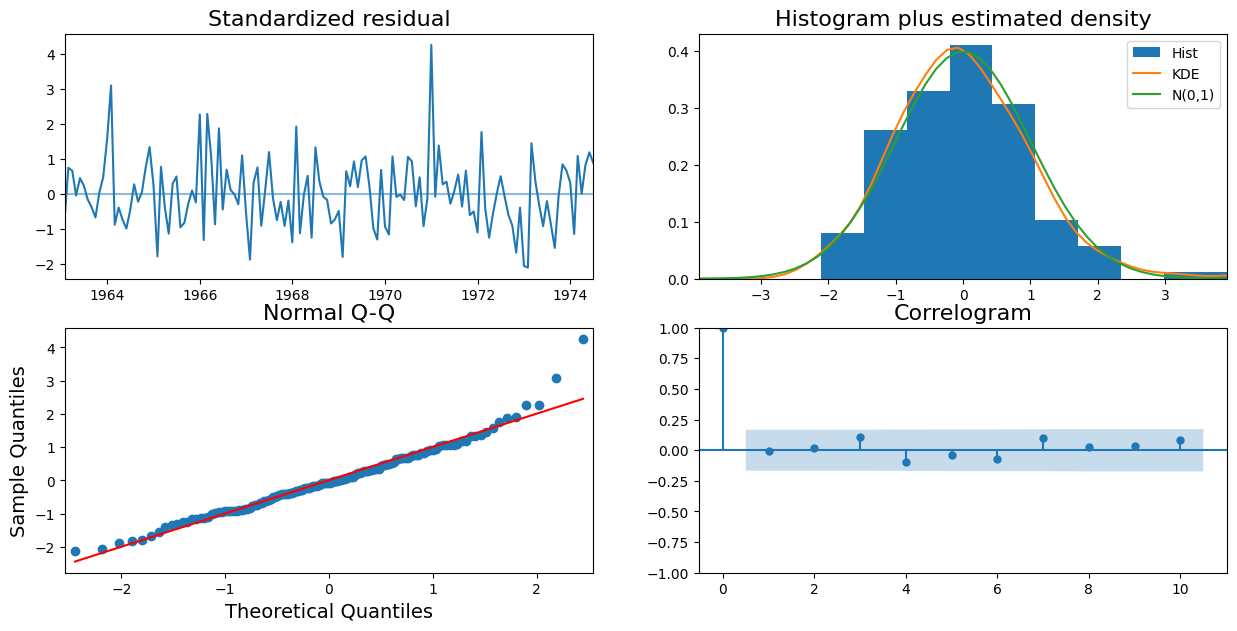

In [12]:
auto_model.plot_diagnostics(figsize=(15, 7)); plt.show()

In [13]:
auto_model.scoring

'mse'

In [14]:
auto_model

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings=True, with_intercept=False)

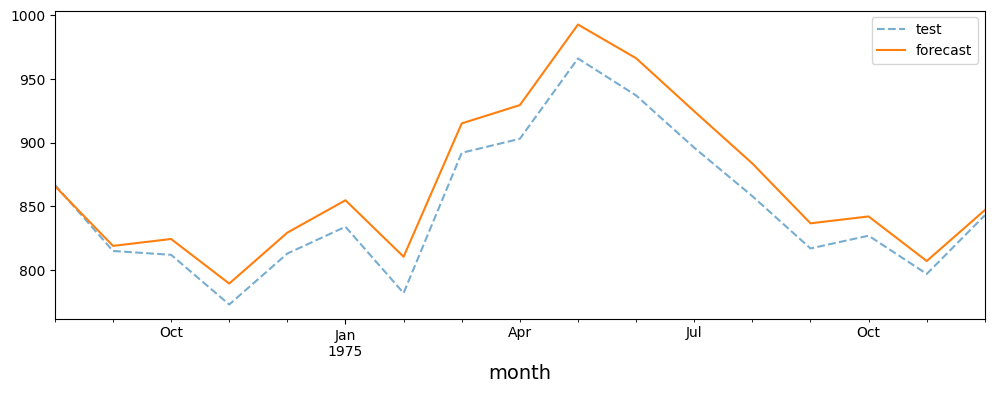

In [15]:
n = test.shape[0]
index = test.index
ax = test.plot(style='--', alpha=0.6, figsize=(12, 4))
pd.Series(auto_model.predict(n_periods=n), 
          index=index).plot(style='-', ax=ax)
plt.legend(['test', 'forecast']); plt.show()

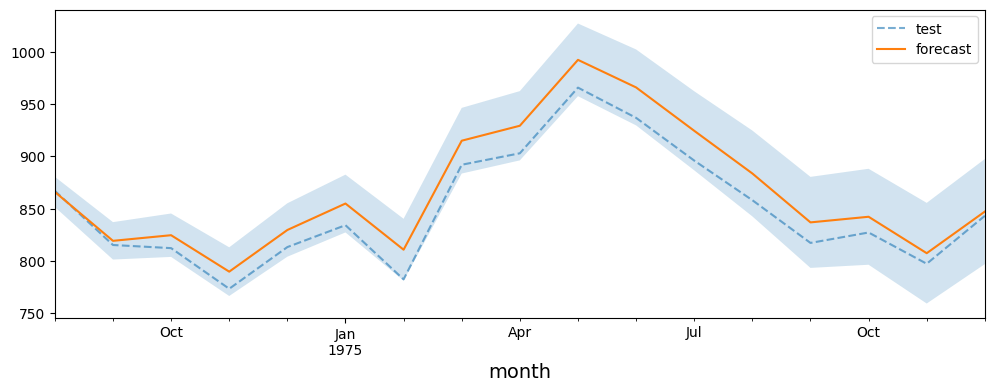

In [16]:
n = test.shape[0]
forecast, conf_interval = auto_model.predict(n_periods=n, return_conf_int=True)
lower_ci, upper_ci  = zip(*conf_interval)

index = test.index
ax = test.plot(style='--', alpha=0.6, figsize=(12, 4))
pd.Series(forecast, index=index).plot(style='-', ax=ax)
plt.fill_between(index, lower_ci, upper_ci, alpha=0.2)
plt.legend(['test', 'forecast']); plt.show()

In [17]:
sum(forecast) == sum(conf_interval.mean(axis=1))

True

## There is more

In [18]:
from pmdarima.arima.utils import ndiffs, nsdiffs

# ADF test:
n_adf = ndiffs(milk, test='adf') 
# KPSS test (auto_arima default):
n_kpss = ndiffs(milk, test='kpss') 
# PP test:
n_pp = ndiffs(milk, test='pp')  

In [19]:
print(f"""
differencing (d) term using:
    ADF: {n_adf}
    KPSS: {n_kpss}
    PP: {n_pp}
""")


differencing (d) term using:
    ADF: 0
    KPSS: 1
    PP: 0



In [20]:
# OCSB test
max_D = nsdiffs(milk, test='ocsb', m=12, max_D=12) 

In [21]:
print(f"Seasonal differencing (D) term: {max_D}")

Seasonal differencing (D) term: 1


In [22]:
model = pm.auto_arima(train, 
                      seasonal=True,
                      with_intercept=True,
                      d=1,
                      max_d=2,
                      start_p=0, max_p=2,
                      start_q=0, max_q=2,
                      m=12,
                      D=1,
                      max_D=2,
                      start_P=0, max_P=2,
                      start_Q=0, max_Q=2,
                      information_criterion='aic',
                      stepwise=False,
                      out_of_sample_siz=25,
                      test='kpss',
                      score='mape',
                      trace=True)

 ARIMA(0,1,0)(0,1,0)[12] intercept   : AIC=1007.319, Time=0.12 sec
 ARIMA(0,1,0)(0,1,1)[12] intercept   : AIC=966.470, Time=0.50 sec
 ARIMA(0,1,0)(0,1,2)[12] intercept   : AIC=968.422, Time=0.48 sec
 ARIMA(0,1,0)(1,1,0)[12] intercept   : AIC=983.036, Time=0.24 sec
 ARIMA(0,1,0)(1,1,1)[12] intercept   : AIC=968.438, Time=0.23 sec
 ARIMA(0,1,0)(1,1,2)[12] intercept   : AIC=970.470, Time=0.76 sec
 ARIMA(0,1,0)(2,1,0)[12] intercept   : AIC=973.451, Time=0.64 sec
 ARIMA(0,1,0)(2,1,1)[12] intercept   : AIC=968.640, Time=0.55 sec
 ARIMA(0,1,0)(2,1,2)[12] intercept   : AIC=inf, Time=3.10 sec
 ARIMA(0,1,1)(0,1,0)[12] intercept   : AIC=998.468, Time=0.08 sec
 ARIMA(0,1,1)(0,1,1)[12] intercept   : AIC=958.000, Time=0.17 sec
 ARIMA(0,1,1)(0,1,2)[12] intercept   : AIC=959.947, Time=0.56 sec
 ARIMA(0,1,1)(1,1,0)[12] intercept   : AIC=973.934, Time=0.19 sec
 ARIMA(0,1,1)(1,1,1)[12] intercept   : AIC=959.963, Time=0.33 sec
 ARIMA(0,1,1)(1,1,2)[12] intercept   : AIC=962.000, Time=0.72 sec
 ARIMA(0,1,1)

In [23]:
model.out_of_sample_size

0

In [24]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  151
Model:             SARIMAX(2, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -472.969
Date:                            Mon, 17 Apr 2023   AIC                            957.937
Time:                                    15:47:07   BIC                            975.501
Sample:                                01-01-1962   HQIC                           965.075
                                     - 07-01-1974                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0461      0.621     -0.074      0.941      -1.263       1.171
ar.L1         -1.1997      0.092    -13.043      0.000      -1.380      -1.019
ar.L2         -0.3072      0.098     -3.137      0.002      -0.499      -0.115
ma.L1          0.9585      0.066     14.614      0.000       0.830       1.087
ma.S.L12      -0.6124      0.084     -7.289      0.000      -0.777      -0.448
sigma2        52.8051      5.479      9.637      0.000      42.066      63.544
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                41.88
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               1.28   Skew:                             0.82
Prob(H) (two-sided):                  0.41   Kurtosis:                         5.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

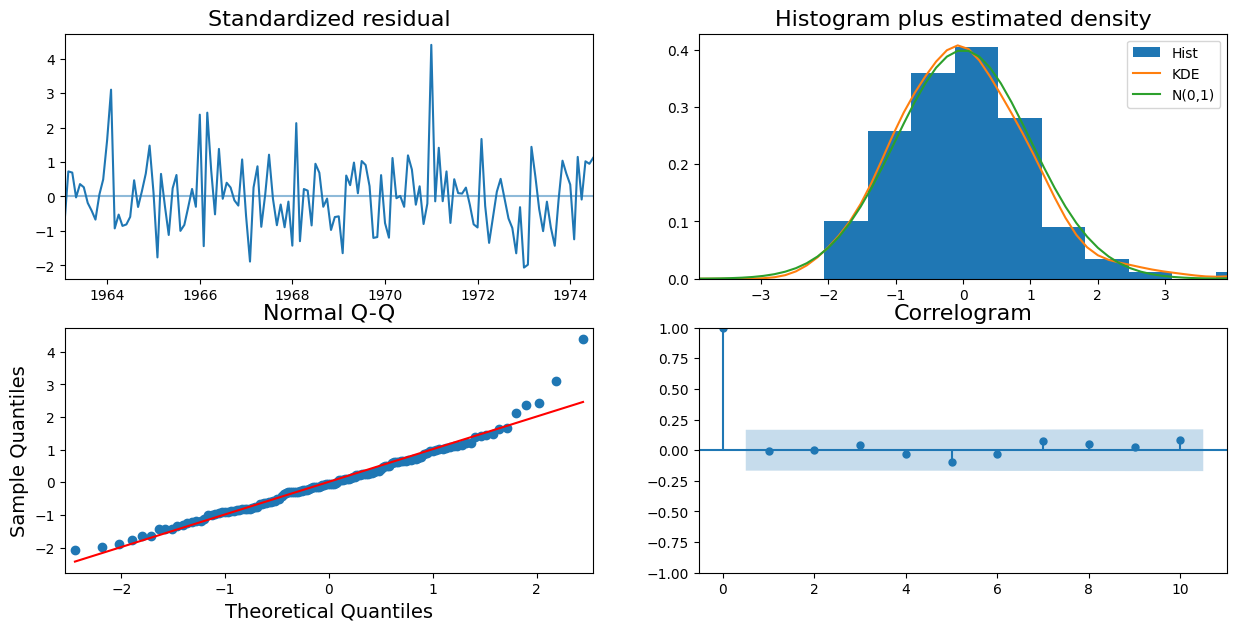

In [25]:
model.plot_diagnostics(figsize=(15, 7)); plt.show()

# Recipe 2. Forecasting Time Series Data using Prophet


It is recommended that you create a new virtual Python environment for Prophet to avoid issues with your current environment. If you need a quick refresher on how to create a virtual Python environment, check out the Development environment setup recipe from **Chapter 1**, *Getting Started with Time Series Analysis*. That chapter covers a method using `venv`.

Let's learn how to use conda. You can give the environment any name you like. For the following example, we will name our environment prophet:

To make the new prophet environment visible within Jupyter, run the following code:
```
python -m ipykernel install --user --name prophet --displayname "fbProphet"
```

* To install Prophet using `pip`, you will need to install `pystan` first. Make sure you install the supported PyStan version. You can check the documentation at https://
facebook.github.io/prophet/docs/installation.html#python for the latest instructions:

In [26]:
!pip3 install -U pystan

# Once installed, run the following command:

!pip3 install -U prophet

  Using cached aiohttp-3.8.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.0 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 1.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.4/43.4 MB 1.1 MB/s eta 0:00:0000:0100:02m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 3.2 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.4/117.4 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.1/278.1 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.3/154.3 kB 2.6 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 kB 2.3 MB/s eta 0:00:00
  Created wheel for pysimdjson: filename=pysimdjson-5.0.2-cp311-cp311-linux_x86_64.whl size=818817 sha256=98036e97285017d0e1de99ba2af594b9df2795681c64d59b05bc6f216e840a55
  Stored in directory: /root/.cache/pip/wheels/0a/79/aa/f8229f0fd5e28284366dccf2649ed3445880

For additional information or troubleshooting when installing with pip, please refer to their official documentation.

In [27]:
from prophet import Prophet

milk = pd.read_csv('datasets/milk_production.csv', parse_dates=['month'], )
milk.columns = ['ds', 'y']

In [28]:
milk.head()

,ds,y
0,1962-01-01,589
1,1962-02-01,561
2,1962-03-01,640
3,1962-04-01,656
4,1962-05-01,727


In [29]:
idx = round(len(milk) * 0.90)
train = milk[:idx]
test = milk[idx:]
print(f'Train: {train.shape}')
print(f'Test: {test.shape}')

Train: (151, 2)
Test: (17, 2)


In [30]:
milk.tail()

,ds,y
163,1975-08-01,858
164,1975-09-01,817
165,1975-10-01,827
166,1975-11-01,797
167,1975-12-01,843


<Axes: title={'center': 'Monthly Milk Production'}, xlabel='ds'>

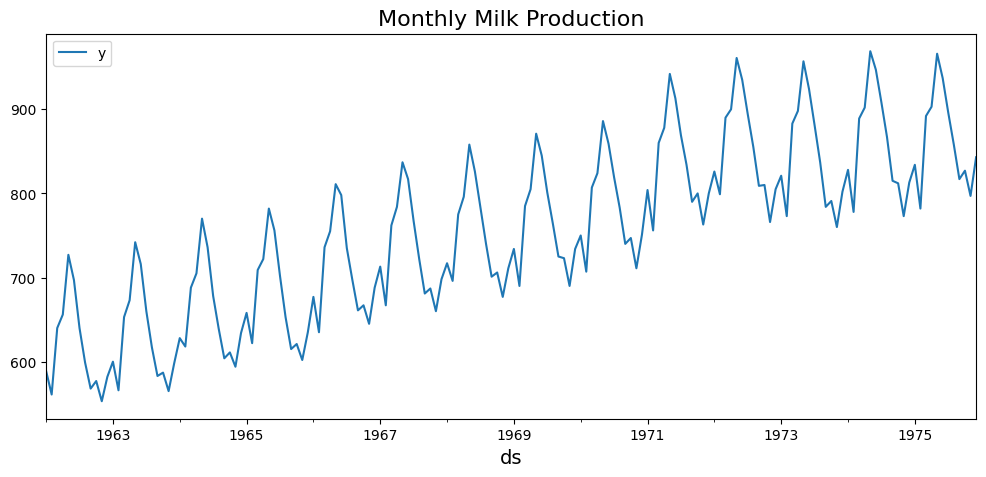

In [31]:
milk.set_index('ds').plot(title="Monthly Milk Production")

In [32]:
model = Prophet().fit(train)

15:49:30 - cmdstanpy - INFO - Chain [1] start processing
15:49:30 - cmdstanpy - INFO - Chain [1] done processing


In [33]:
model.seasonalities

OrderedDict([('yearly',
              {'period': 365.25,
               'fourier_order': 10,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

In [34]:
model.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [35]:
future = model.make_future_dataframe(len(test), freq='MS')

In [36]:
len(milk) == len(future)

True

In [37]:
future.shape

(168, 1)

In [38]:
forecast = model.predict(future)

In [39]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [40]:
cols = ['ds', 'yhat', 'yhat_lower', 'yhat_upper']

In [41]:
milk.head()

,ds,y
0,1962-01-01,589
1,1962-02-01,561
2,1962-03-01,640
3,1962-04-01,656
4,1962-05-01,727


In [42]:
forecast[cols].head()

,ds,yhat,yhat_lower,yhat_upper
0,1962-01-01,586.947641,577.702621,596.142143
1,1962-02-01,547.542558,538.701099,557.007643
2,1962-03-01,641.541198,632.233394,650.651139
3,1962-04-01,659.370311,650.765663,668.259369
4,1962-05-01,722.446690,713.227415,731.512185


In [43]:
pd.concat([forecast['yhat'].iloc[0:5], train['y'].iloc[0:5]], axis=1)

,yhat,y
0,586.947641,589
1,547.542558,561
2,641.541198,640
3,659.370311,656
4,722.446690,727


In [44]:
pd.concat([forecast['yhat'].iloc[-5:], test['y'].iloc[-5:]], axis=1)

,yhat,y
163,842.003669,858
164,800.936189,817
165,805.180101,827
166,774.112623,797
167,807.381166,843


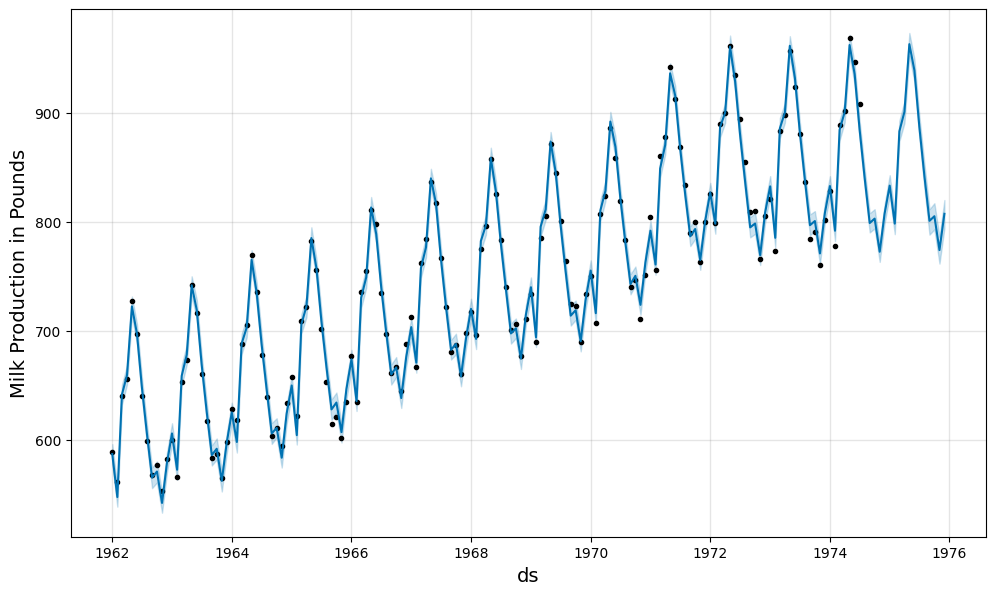

In [45]:
model.plot(forecast, ylabel="Milk Production in Pounds")
plt.show()

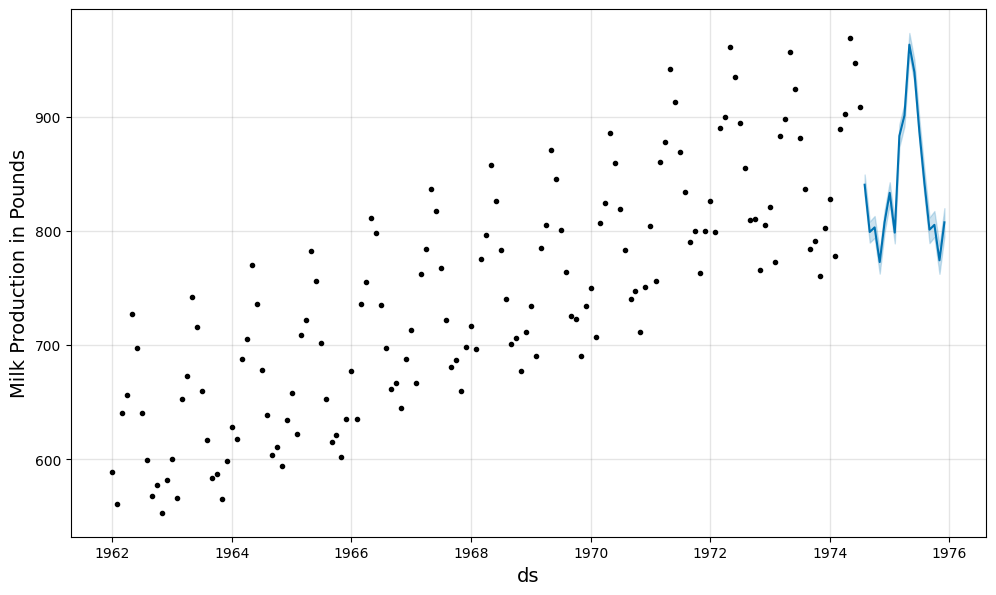

In [46]:
predicted = model.predict(test)
model.plot(predicted, ylabel="Milk Production in Pounds")
plt.show()

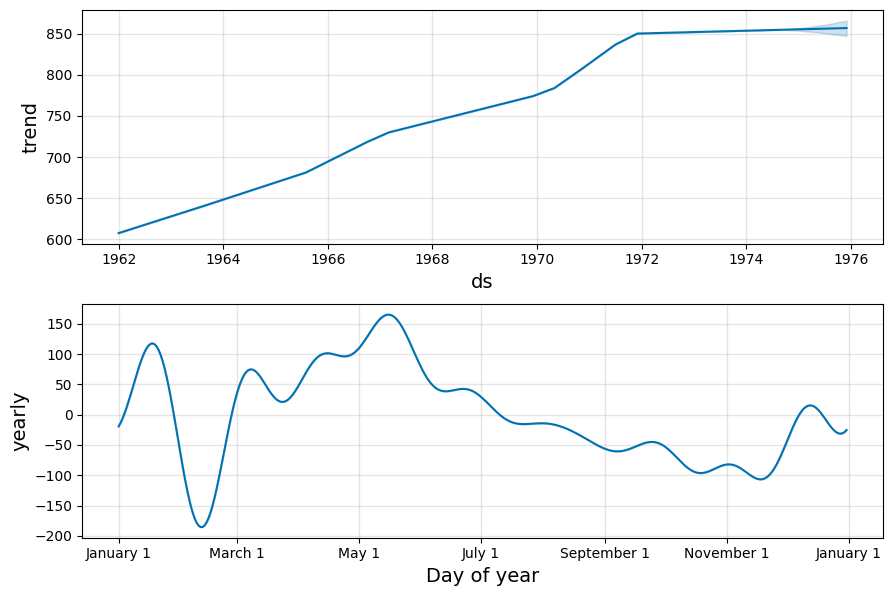

In [47]:
model.plot_components(forecast)
plt.show()

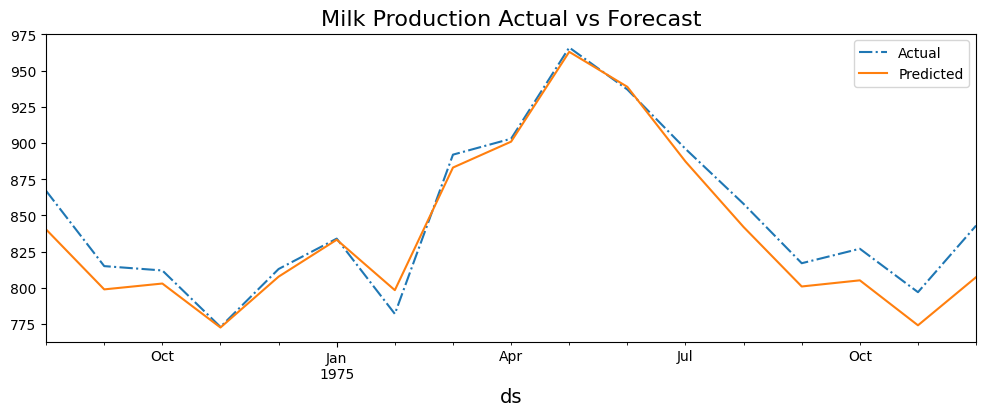

In [48]:
ax = test.plot(x='ds', y='y', 
                label='Actual', 
                style='-.', 
                figsize=(12, 4))
predicted.plot(x='ds', y='yhat', 
               label='Predicted', 
               ax=ax)
plt.title("Milk Production Actual vs Forecast")
plt.show()

### How it works


In [49]:
model.changepoints.shape

(25,)

In [50]:
model.changepoints.head()

5    1962-06-01
10   1962-11-01
14   1963-03-01
19   1963-08-01
24   1964-01-01
Name: ds, dtype: datetime64[ns]

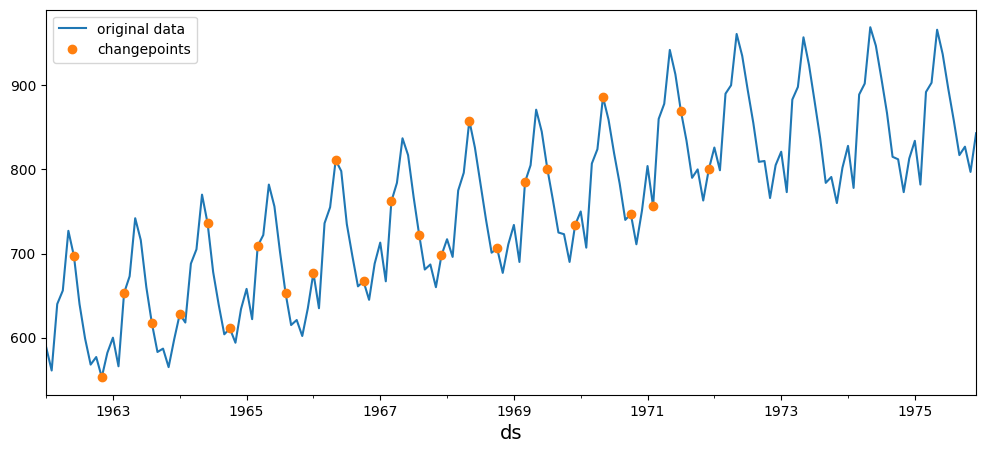

In [51]:
ax = milk.set_index('ds').plot(figsize=(12, 5))
milk.set_index('ds').loc[model.changepoints].plot(style='o', ax=ax)
plt.legend(['original data', 'changepoints'])
plt.show()

### There is more

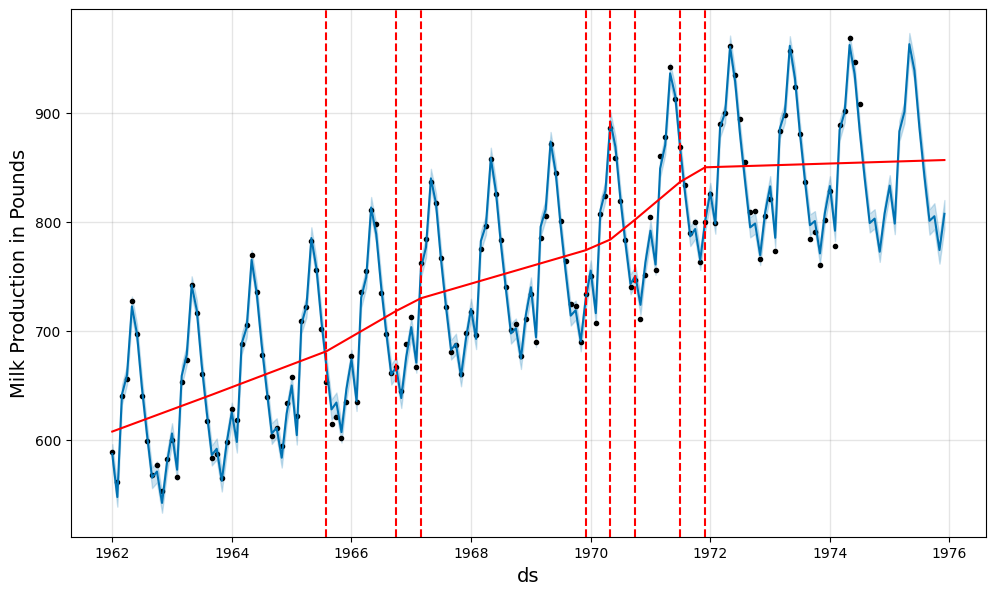

In [52]:
from prophet.plot import add_changepoints_to_plot

fig = model.plot(forecast, ylabel="Milk Production in Pounds")
add_changepoints_to_plot(fig.gca(), model, forecast)
plt.show()

**Logistic Growth**

15:49:42 - cmdstanpy - INFO - Chain [1] start processing
15:49:42 - cmdstanpy - INFO - Chain [1] done processing


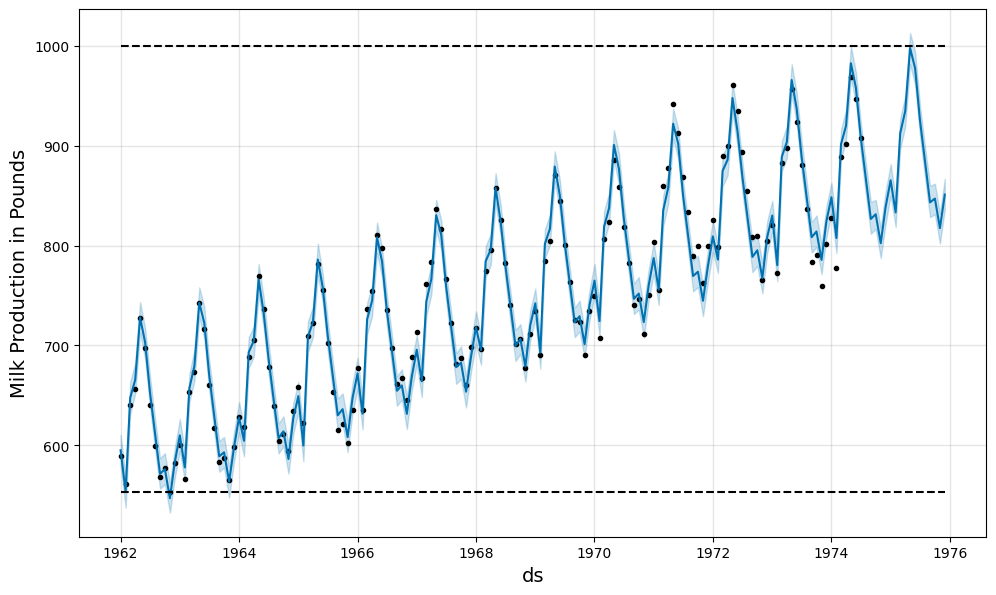

In [53]:
train['cap'] = 1000
train['floor'] = train['y'].min()
model = Prophet(growth='logistic').fit(train)

future = model.make_future_dataframe(len(test), freq='MS')
future['cap'] = 1000
future['floor'] = train['y'].min()
forecast = model.predict(future)
model.plot(forecast, ylabel="Milk Production in Pounds")
add_changepoints_to_plot(fig.gca(), model, forecast)
plt.show()

# Recipe 3. Forecasting Multivariate Time Series Data using VAR

**VAR(1) Formula Example**
$$
\Large y_{(1),t} = \alpha_{1} + \theta_{11}y_{(1),t-1} + \theta_{12}y_{(2), t-1} + \epsilon_{(1),t} \\\Large y_{(2),t} = \alpha_{2} + \theta_{21}y_{(1),t-1} + \theta_{22}y_{(2),t-1} + \epsilon_{(2),t} 
\\~\\
\\~\\
\Large \begin{bmatrix} y_{(1),t} \\ y_{(2),t} \end{bmatrix} =
\Large \begin{bmatrix} \alpha_{1} \\ \alpha_{2} \end{bmatrix} + \begin{bmatrix} \theta_{11} & \theta_{12} \\ \theta_{21} &  \theta_{22} \end{bmatrix}  \begin{bmatrix} y_{(1),t-1} \\ y_{(2), t-1} \end{bmatrix} + \begin{bmatrix} \epsilon_{(1),t} \\ \epsilon_{(2),t} \end{bmatrix}
$$

In [54]:
import pandas_datareader.data as web
from statsmodels.tsa.api import VAR,adfuller, kpss
from statsmodels.tsa.stattools import grangercausalitytests

In [55]:
import statsmodels as sm
import matplotlib as mp

In [56]:
start = '01-01-1990'
end = '04-01-2022'
economic_df = web.FredReader(symbols=['FEDFUNDS', 'unrate'],
                             start=start,
                             end=end).read()
# you can store the file for future reference (uncomment below)
# file = 'datasets/economic_df.pickle'
# economic_df.to_pickle(file)
# economic_df = pd.read_pickle(file)

In [57]:
economic_df.head()

,FEDFUNDS,unrate
DATE,,
1990-01-01,8.23,5.4
1990-02-01,8.24,5.3
1990-03-01,8.28,5.2
1990-04-01,8.26,5.4
1990-05-01,8.18,5.4


In [58]:
economic_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 388 entries, 1990-01-01 to 2022-04-01
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   FEDFUNDS  388 non-null    float64
 1   unrate    388 non-null    float64
dtypes: float64(2)
memory usage: 9.1 KB


In [59]:
economic_df.index.freq = 'MS'

In [60]:
economic_df.index

DatetimeIndex(['1990-01-01', '1990-02-01', '1990-03-01', '1990-04-01',
               '1990-05-01', '1990-06-01', '1990-07-01', '1990-08-01',
               '1990-09-01', '1990-10-01',
               ...
               '2021-07-01', '2021-08-01', '2021-09-01', '2021-10-01',
               '2021-11-01', '2021-12-01', '2022-01-01', '2022-02-01',
               '2022-03-01', '2022-04-01'],
              dtype='datetime64[ns]', name='DATE', length=388, freq='MS')

In [61]:
economic_df.isna().sum()

FEDFUNDS    0
unrate      0
dtype: int64

In [62]:
economic_df.shape

(388, 2)

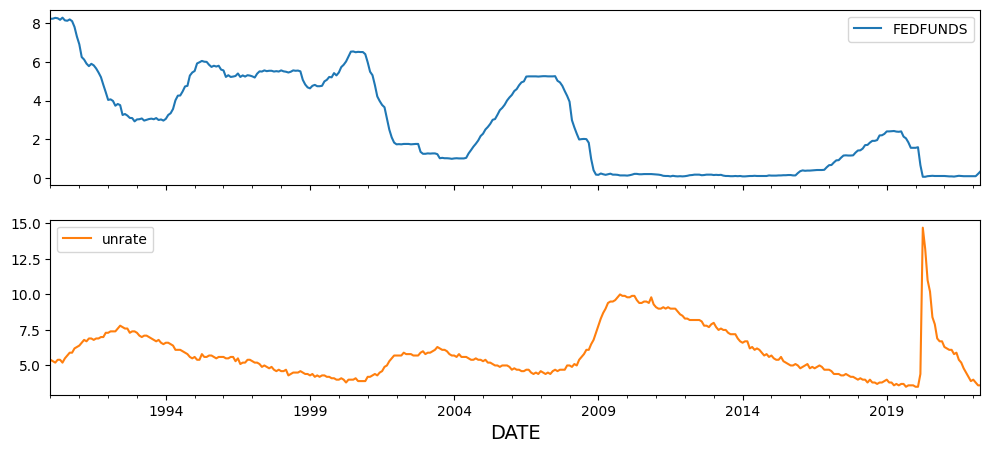

In [63]:
economic_df.plot(subplots=True); plt.show()

In [64]:
def check_stationarity(df):
    kps = kpss(df)
    adf = adfuller(df)
    
    kpss_pv, adf_pv = kps[1], adf[1]
    kpssh, adfh = 'Stationary', 'Non-stationary'
    
    if adf_pv < 0.05:
        # Reject ADF Null Hypothesis
        adfh = 'Stationary'
    if kpss_pv < 0.05:
        # Reject KPSS Null Hypothesis
        kpssh = 'Non-stationary'
    return (kpssh, adfh)

In [65]:
for i in economic_df:
    kps, adf = check_stationarity(economic_df[i])
    print(f"{i} adf: {adf}, kpss: {kps}")

FEDFUNDS adf: Stationary, kpss: Non-stationary
unrate adf: Stationary, kpss: Stationary


The data for testing whether the time series in the second column Granger
causes the time series in the first column. Missing values are not
supported.

In [66]:
granger = grangercausalitytests(economic_df[['unrate', 'FEDFUNDS']], maxlag=12)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5415  , p=0.4623  , df_denom=384, df_num=1
ssr based chi2 test:   chi2=0.5457  , p=0.4601  , df=1
likelihood ratio test: chi2=0.5454  , p=0.4602  , df=1
parameter F test:         F=0.5415  , p=0.4623  , df_denom=384, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=21.6287 , p=0.0000  , df_denom=381, df_num=2
ssr based chi2 test:   chi2=43.8250 , p=0.0000  , df=2
likelihood ratio test: chi2=41.5108 , p=0.0000  , df=2
parameter F test:         F=21.6287 , p=0.0000  , df_denom=381, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=21.5527 , p=0.0000  , df_denom=378, df_num=3
ssr based chi2 test:   chi2=65.8554 , p=0.0000  , df=3
likelihood ratio test: chi2=60.7928 , p=0.0000  , df=3
parameter F test:         F=21.5527 , p=0.0000  , df_denom=378, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=16.1117 , p=0.0000  

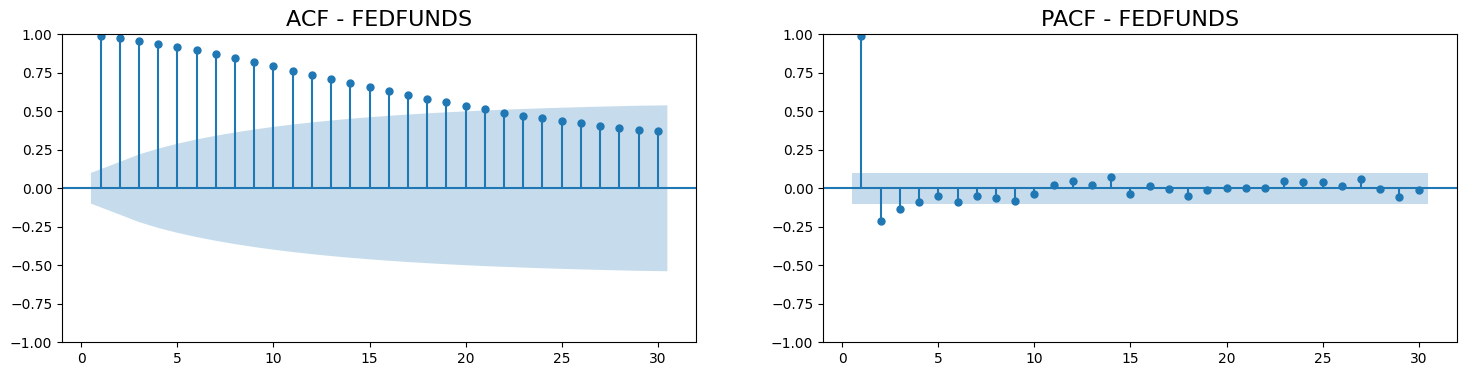

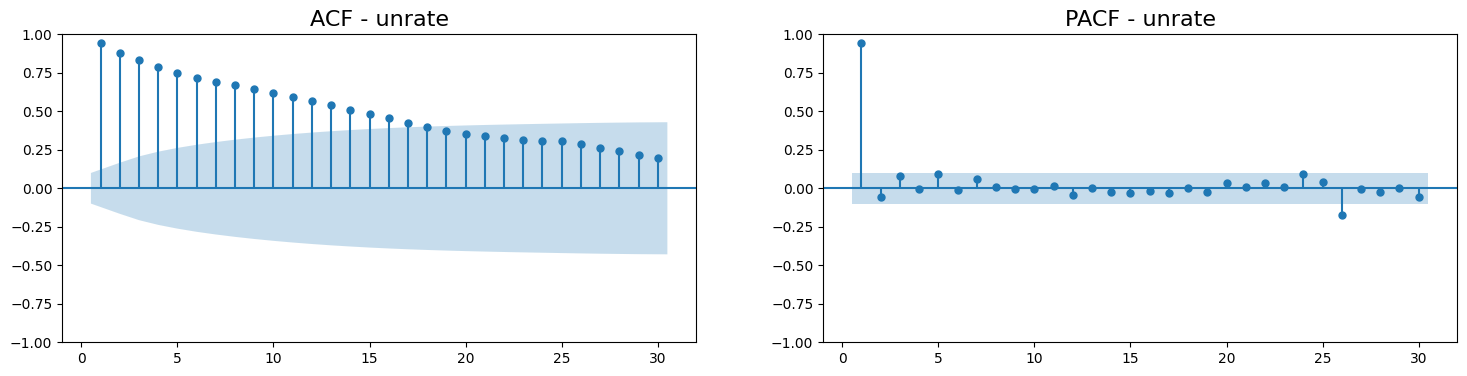

In [67]:
for col in economic_df.columns:
    fig, ax = plt.subplots(1, 2, figsize=(18, 4))
    plot_acf(economic_df[col], zero=False, 
             lags=30, ax=ax[0], title=f"ACF - {col}")
    plot_pacf(economic_df[col], zero=False, 
              lags=30, ax=ax[1], title=f"PACF - {col}"); plt.show()

In [68]:
train = economic_df.loc[:'2019']
test = economic_df.loc['2020':]

In [69]:
train.index

DatetimeIndex(['1990-01-01', '1990-02-01', '1990-03-01', '1990-04-01',
               '1990-05-01', '1990-06-01', '1990-07-01', '1990-08-01',
               '1990-09-01', '1990-10-01',
               ...
               '2019-03-01', '2019-04-01', '2019-05-01', '2019-06-01',
               '2019-07-01', '2019-08-01', '2019-09-01', '2019-10-01',
               '2019-11-01', '2019-12-01'],
              dtype='datetime64[ns]', name='DATE', length=360, freq='MS')

In [70]:
test.index

DatetimeIndex(['2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01',
               '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01',
               '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01',
               '2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01'],
              dtype='datetime64[ns]', name='DATE', freq='MS')

In [71]:
print(f"Train: {len(train)}, Test: {len(test)}")

Train: 360, Test: 28


In [72]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit(train)
train_sc = pd.DataFrame(scale.transform(train),
                        index=train.index,
                        columns=train.columns)
test_sc = pd.DataFrame(scale.transform(test), 
                       index=test.index,
                       columns=test.columns)

In [73]:
test[0:5]

,FEDFUNDS,unrate
DATE,,
2020-01-01,1.55,3.5
2020-02-01,1.58,3.5
2020-03-01,0.65,4.4
2020-04-01,0.05,14.7
2020-05-01,0.05,13.2


In [74]:
scale.inverse_transform(test_sc)[0:5]

array([[ 1.55,  3.5 ],
       [ 1.58,  3.5 ],
       [ 0.65,  4.4 ],
       [ 0.05, 14.7 ],
       [ 0.05, 13.2 ]])

<Axes: xlabel='DATE'>

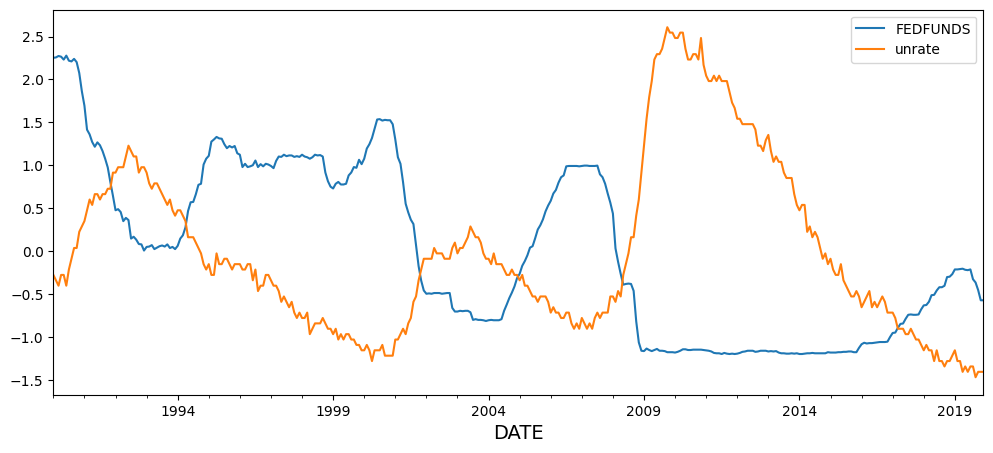

In [75]:
train_sc.plot()

In [76]:
train_sc.shape

(360, 2)

In [77]:
test_sc.shape

(28, 2)

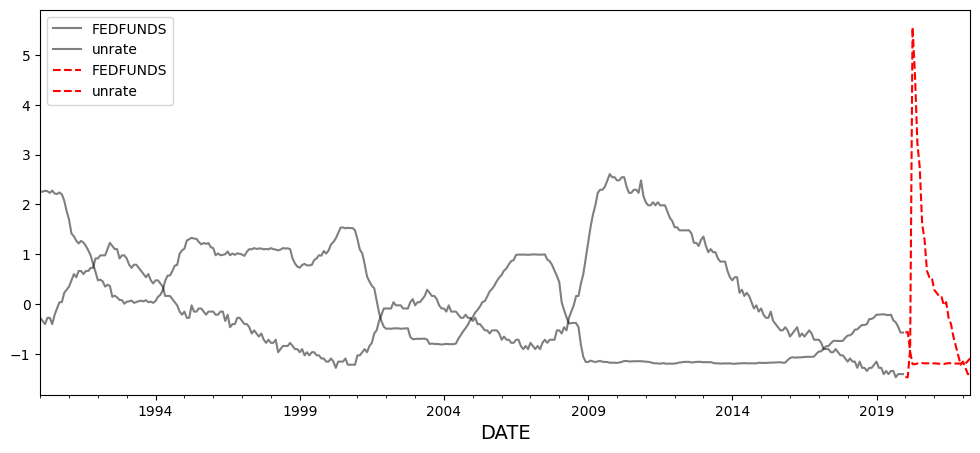

In [78]:
ax = train_sc.plot(style='k', alpha=0.5, label='train')
test_sc.plot(ax=ax, style='r--', label='test')
plt.legend(); plt.show()

In [79]:
model = VAR(endog=train_sc)
res = model.select_order(maxlags=10)
res.summary()

,AIC,BIC,FPE,HQIC
0,-0.3450,-0.3229,0.7083,-0.3362
1,-9.984,-9.918,4.611e-05,-9.958
2,-10.50,-10.39,2.746e-05,-10.46
3,-10.55,-10.40,2.613e-05,-10.49
4,-10.60,-10.40*,2.490e-05,-10.52*
5,-10.60,-10.35,2.500e-05,-10.50
6,-10.62,-10.33,2.447e-05,-10.50
7,-10.65*,-10.32,2.379e-05*,-10.51
8,-10.63,-10.25,2.421e-05,-10.48
9,-10.62,-10.20,2.447e-05,-10.45


In [80]:
res.selected_orders

{'aic': 7, 'bic': 4, 'hqic': 4, 'fpe': 7}

In [81]:
print(f"AIC: {res.aic} , BIC: {res.bic}, \
      HQ: {res.hqic}, FPE: {res.fpe}")

AIC: 7 , BIC: 4,       HQ: 4, FPE: 7


In [82]:
results = model.fit(maxlags=7, ic='aic')

In [83]:
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 17, Apr, 2023
Time:                     15:50:06
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -10.3148
Nobs:                     353.000    HQIC:                  -10.5127
Log likelihood:           906.792    FPE:                2.38598e-05
AIC:                     -10.6434    Det(Omega_mle):     2.19544e-05
--------------------------------------------------------------------
Results for equation FEDFUNDS
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const              -0.002763         0.002959           -0.934           0.350
L1.FEDFUNDS         1.438838         0.053660           26.814           0.000
L1.unrate          -0.070386         0.033673           -2.090   

In [84]:
type(results)

statsmodels.tsa.vector_ar.var_model.VARResultsWrapper

In [85]:
lag_order = results.k_ar
lag_order

7

In [86]:
results.params

,FEDFUNDS,unrate
const,-0.002763,-0.004557
L1.FEDFUNDS,1.438838,-0.224553
L1.unrate,-0.070386,0.929021
L2.FEDFUNDS,-0.314183,0.330518
L2.unrate,0.058783,0.143089
L3.FEDFUNDS,0.000892,-0.270533
L3.unrate,-0.029408,0.021951
L4.FEDFUNDS,-0.283291,0.219337
L4.unrate,0.048564,-0.032865
L5.FEDFUNDS,0.162109,-0.159646


In [87]:
train_sc[-lag_order:]

,FEDFUNDS,unrate
DATE,,
2019-06-01,-0.221874,-1.406816
2019-07-01,-0.213414,-1.344066
2019-08-01,-0.327635,-1.344066
2019-09-01,-0.365709,-1.469566
2019-10-01,-0.454548,-1.406816
2019-11-01,-0.573000,-1.406816
2019-12-01,-0.573000,-1.406816


<Axes: xlabel='DATE'>

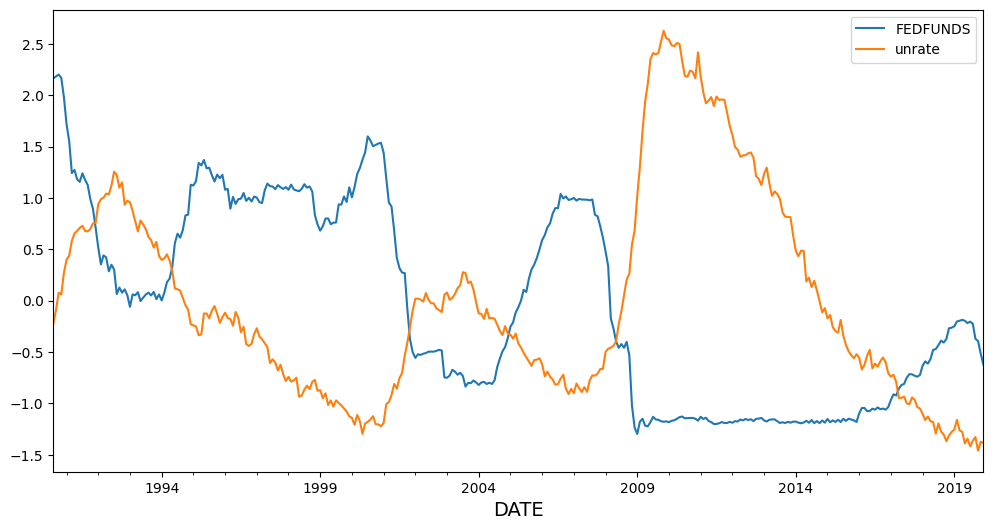

In [88]:
results.fittedvalues.plot(figsize=(12, 6))

array([<Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>], dtype=object)

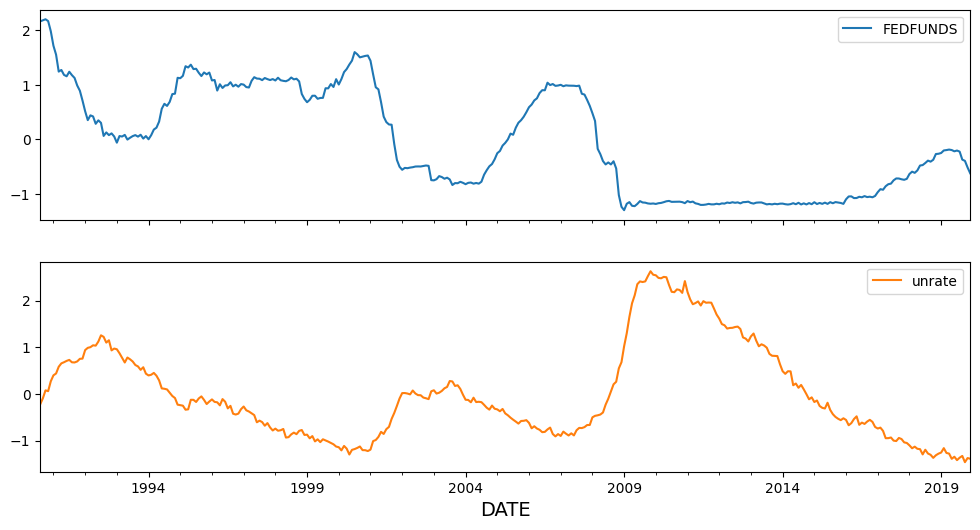

In [89]:
results.fittedvalues.plot(figsize=(12, 6), subplots=True)

In [90]:
forecast[0:10]

,ds,trend,cap,floor,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1962-01-01,618.801488,1000,553,579.755790,610.515131,618.801488,618.801488,-23.906522,-23.906522,-23.906522,-23.906522,-23.906522,-23.906522,0.0,0.0,0.0,594.894966
1,1962-02-01,620.002535,1000,553,537.389849,567.835702,620.002535,620.002535,-66.352698,-66.352698,-66.352698,-66.352698,-66.352698,-66.352698,0.0,0.0,0.0,553.649838
2,1962-03-01,621.102819,1000,553,631.237984,663.366390,621.102819,621.102819,26.287337,26.287337,26.287337,26.287337,26.287337,26.287337,0.0,0.0,0.0,647.390156
3,1962-04-01,622.338231,1000,553,651.832670,682.326007,622.338231,622.338231,43.177977,43.177977,43.177977,43.177977,43.177977,43.177977,0.0,0.0,0.0,665.516208
4,1962-05-01,623.551153,1000,553,712.721432,743.438248,623.551153,623.551153,104.464818,104.464818,104.464818,104.464818,104.464818,104.464818,0.0,0.0,0.0,728.015970
5,1962-06-01,624.822559,1000,553,686.859645,717.483107,624.822559,624.822559,78.322160,78.322160,78.322160,78.322160,78.322160,78.322160,0.0,0.0,0.0,703.144719
6,1962-07-01,626.070530,1000,553,638.487094,669.126340,626.070530,626.070530,27.070923,27.070923,27.070923,27.070923,27.070923,27.070923,0.0,0.0,0.0,653.141454
7,1962-08-01,627.378368,1000,553,596.918342,626.689330,627.378368,627.378368,-15.536717,-15.536717,-15.536717,-15.536717,-15.536717,-15.536717,0.0,0.0,0.0,611.841651
8,1962-09-01,628.704876,1000,553,556.408290,586.862285,628.704876,628.704876,-57.346798,-57.346798,-57.346798,-57.346798,-57.346798,-57.346798,0.0,0.0,0.0,571.358078
9,1962-10-01,630.006459,1000,553,561.106926,592.042452,630.006459,630.006459,-54.002574,-54.002574,-54.002574,-54.002574,-54.002574,-54.002574,0.0,0.0,0.0,576.003885


**Manually creating a similar plot**

In [91]:
past_y = train_sc[-lag_order:].values
n = test_sc.shape[0]
forecast = results.forecast_interval(past_y, n)

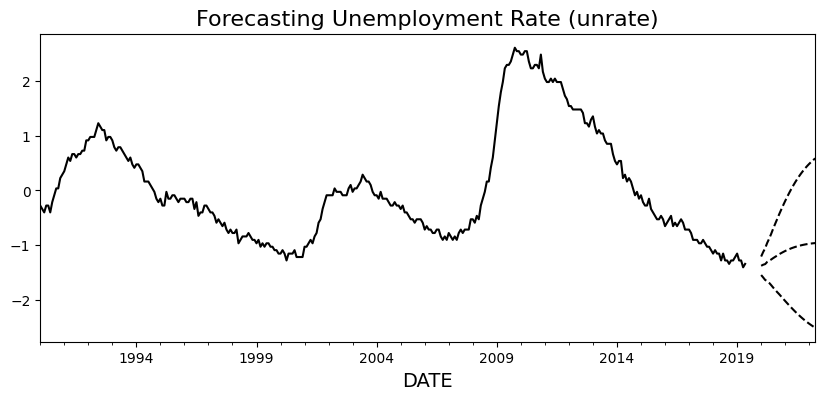

In [92]:
forecast, lower, upper = results.forecast_interval(past_y, steps=n)

idx = test.index
style = 'k--'
ax = train_sc.iloc[:-lag_order, 1].plot(figsize=(10, 4), style='k')
pred_forecast  = pd.Series(forecast[:, 1], index=idx).plot(ax=ax, style=style)
pred_lower = pd.Series(lower[:, 1], index=idx).plot(ax=ax, style=style)
pred_upper  = pd.Series(upper[:, 1], index=idx).plot(ax=ax, style=style)
plt.title("Forecasting Unemployment Rate (unrate)")
plt.show()

Alternatively you can also use `fill_between`

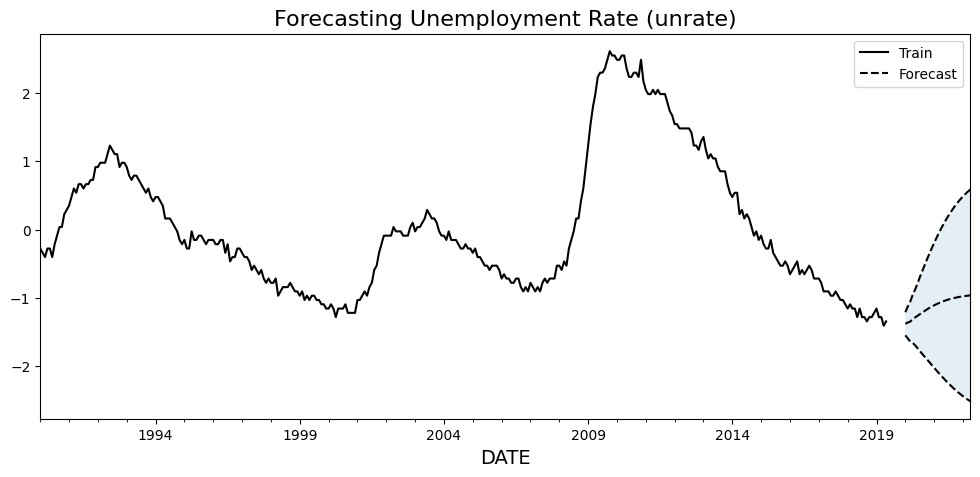

In [93]:
forecast, lower, upper = results.forecast_interval(past_y, steps=n)

idx = test.index; style = 'k--'
ax = train_sc.iloc[:-lag_order, 1].plot(style='k')
pred_forecast  = pd.Series(forecast[:, 1], index=idx).plot(ax=ax, style=style)
pred_lower = pd.Series(lower[:, 1], index=idx).plot(ax=ax, style=style)
pred_upper  = pd.Series(upper[:, 1], index=idx).plot(ax=ax, style=style)
plt.fill_between(idx, lower[:, 1], upper[:, 1], alpha=0.12)
plt.title("Forecasting Unemployment Rate (unrate)")
plt.legend(['Train','Forecast']); plt.show()

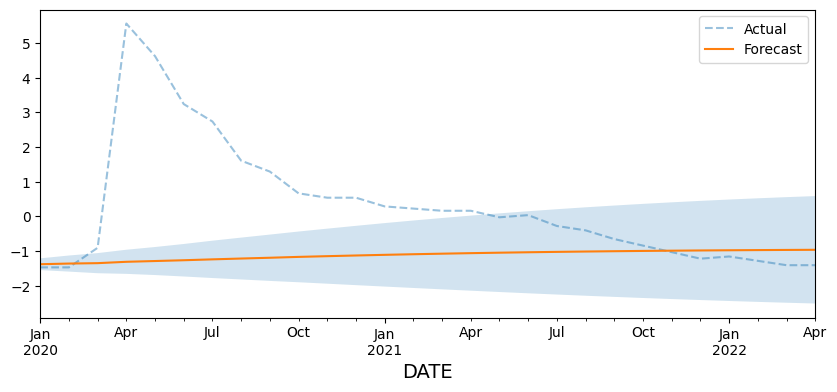

In [94]:
test_sc['unrate'].plot(style='--', alpha=0.45, figsize=(10, 4)).plot()
pd.Series(forecast[:, 1], index=test_sc.index).plot()
plt.fill_between(idx, lower[:, 1], upper[:, 1], alpha=0.2)
plt.legend(['Actual', 'Forecast'])

## There is more
* Comparing the results from VAR(7) with an AR(7) 
* AR(7) is a univariate this way we are comparing using one variable (unrate) to see if using two variables are better or not
* Using ARIMA(7, 0, 0) indicates an AR(7)

In [95]:
from statsmodels.tsa.arima.model import ARIMA

In [96]:
model = ARIMA(train_sc['unrate'], 
              order=(lag_order, 0,0)).fit()

In [97]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 unrate   No. Observations:                  360
Model:                 ARIMA(7, 0, 0)   Log Likelihood                 364.732
Date:                Mon, 17 Apr 2023   AIC                           -711.464
Time:                        15:50:17   BIC                           -676.489
Sample:                    01-01-1990   HQIC                          -697.557
                         - 12-01-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1032      0.448     -0.230      0.818      -0.982       0.776
ar.L1          0.9434      0.047     20.282      0.000       0.852       1.035
ar.L2          0.1797      0.068      2.634      0.008       0.046       0.313
ar.L3          0.0154      0.076      0.201      0.840      -0.134       0.165
ar.L4         -0.0311      0.075     -0.417      0.677      -0.178       0.115
ar.L5          0.0651      0.071      0.914      0.361      -0.074       0.205
ar.L6         -0.0159      0.075     -0.211      0.833      -0.164       0.132
ar.L7         -0.1677      0.052     -3.256      0.001      -0.269      -0.067
sigma2         0.0076      0.001     14.455      0.000       0.007       0.009
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 6.17
Prob(Q):                              0.87   Prob(JB):                         0.05
Heteroskedasticity (H):               1.15   Skew:                             0.19
Prob(H) (two-sided):                  0.45   Kurtosis:                         3.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

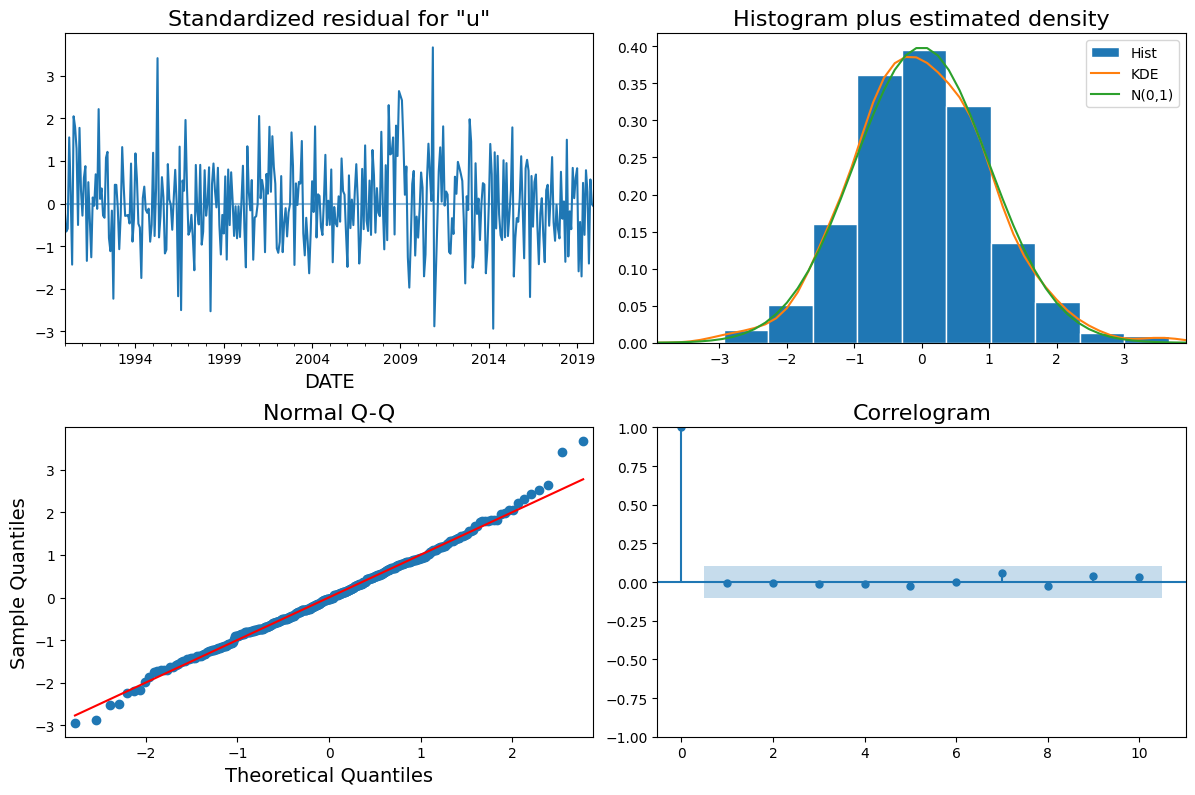

In [98]:
fig = model.plot_diagnostics(figsize=(12, 8));
fig.tight_layout(); plt.show()

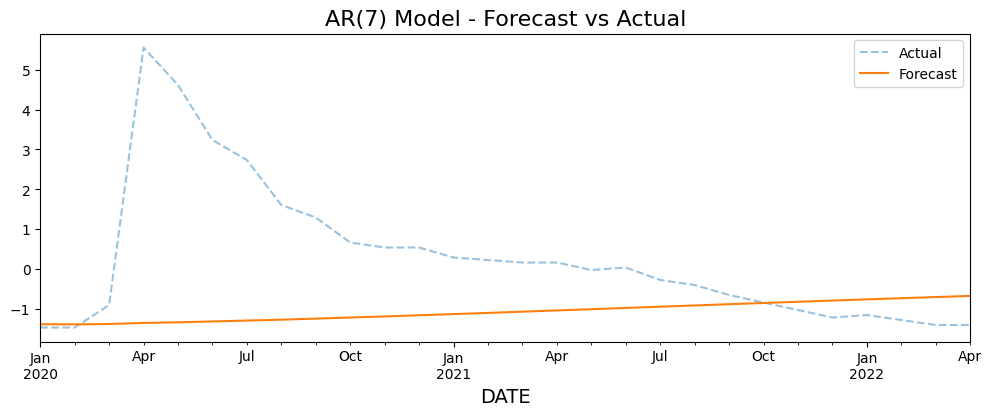

In [99]:
# Plotting the results from an AR(7)
plt.title("AR(7) Model - Forecast vs Actual")
test_sc['unrate'].plot(style='--', alpha=0.45, figsize=(12, 4))
pd.Series(model.forecast(n), index=test_sc.index).plot()
plt.legend(['Actual', 'Forecast'])

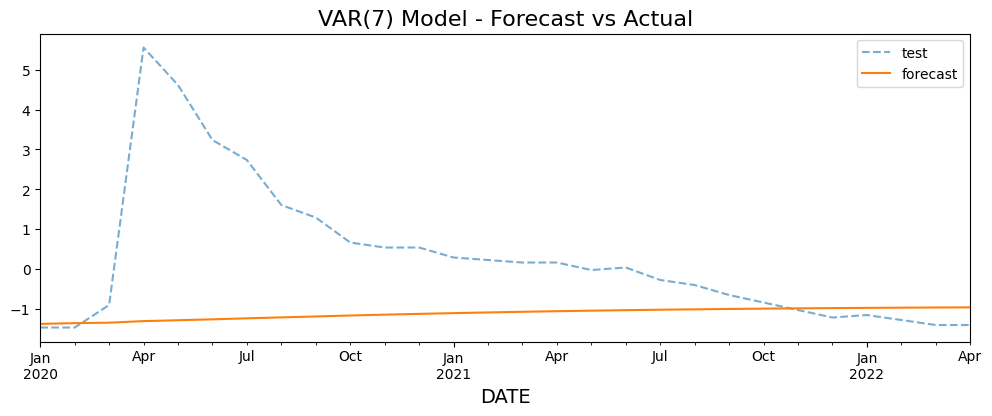

In [100]:
index = test_sc.index
plt.title("VAR(7) Model - Forecast vs Actual")
ax = test_sc['unrate'].plot(style='--', alpha=0.6, figsize=(12, 4))
pd.Series(forecast[:, 1], index=index).plot(style='-', ax=ax)
plt.legend(['test', 'forecast']); plt.show()

In [101]:
from statsmodels.tools.eval_measures import mse
np.sqrt(mse(test['unrate'], forecast[:, 1]))

7.973936419236933

In [102]:
np.sqrt(mse(test['unrate'], model.forecast(n)))

7.955261965461567

# Recipe 4. Evaluating vector autoregressive (VAR) models

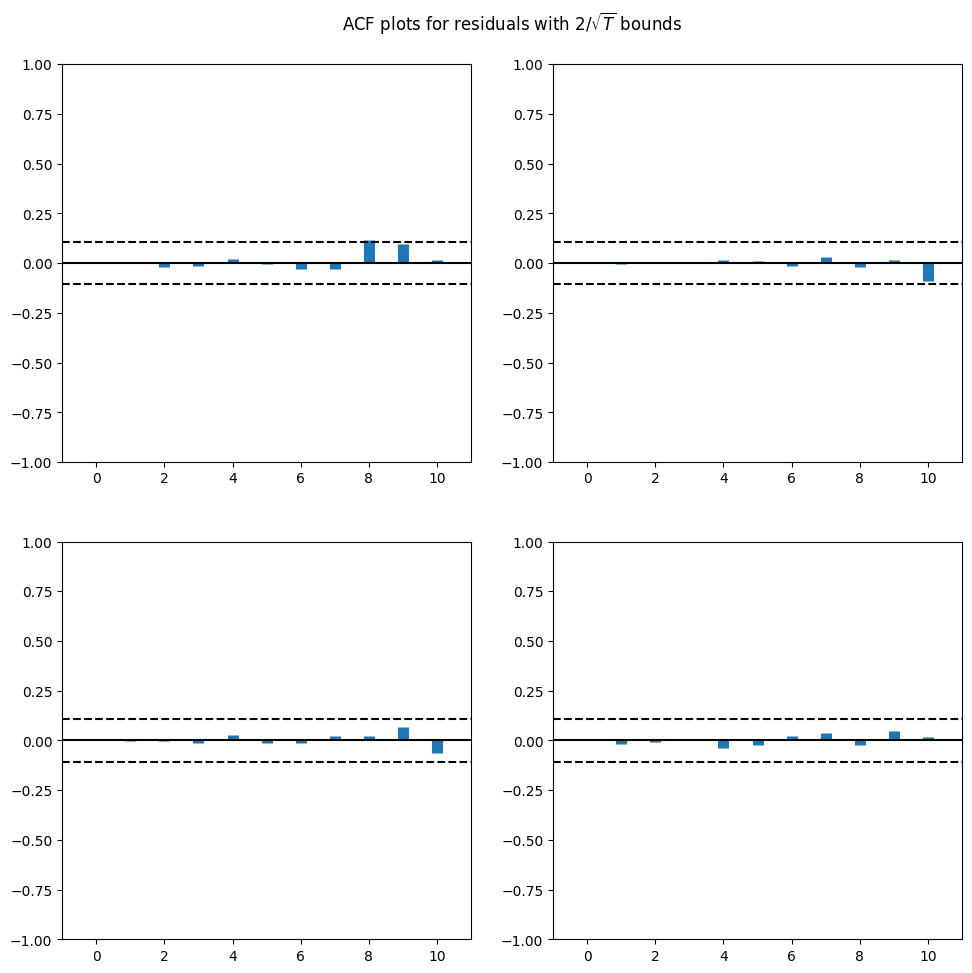

In [103]:
results.plot_acorr(resid=True); plt.show()

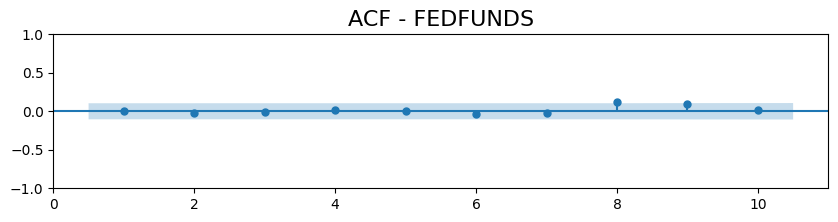

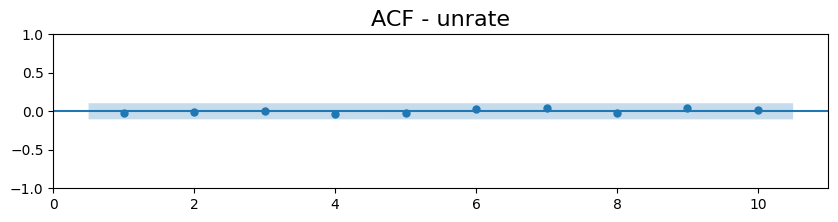

In [104]:
# You can plot your ACF on the resiuals as well using results.resid
for col in results.resid.columns:
    fig, ax = plt.subplots(1, 1, figsize=(10, 2))
    plot_acf(results.resid[col], zero=False, 
             lags=10, ax=ax, title=f"ACF - {col}")

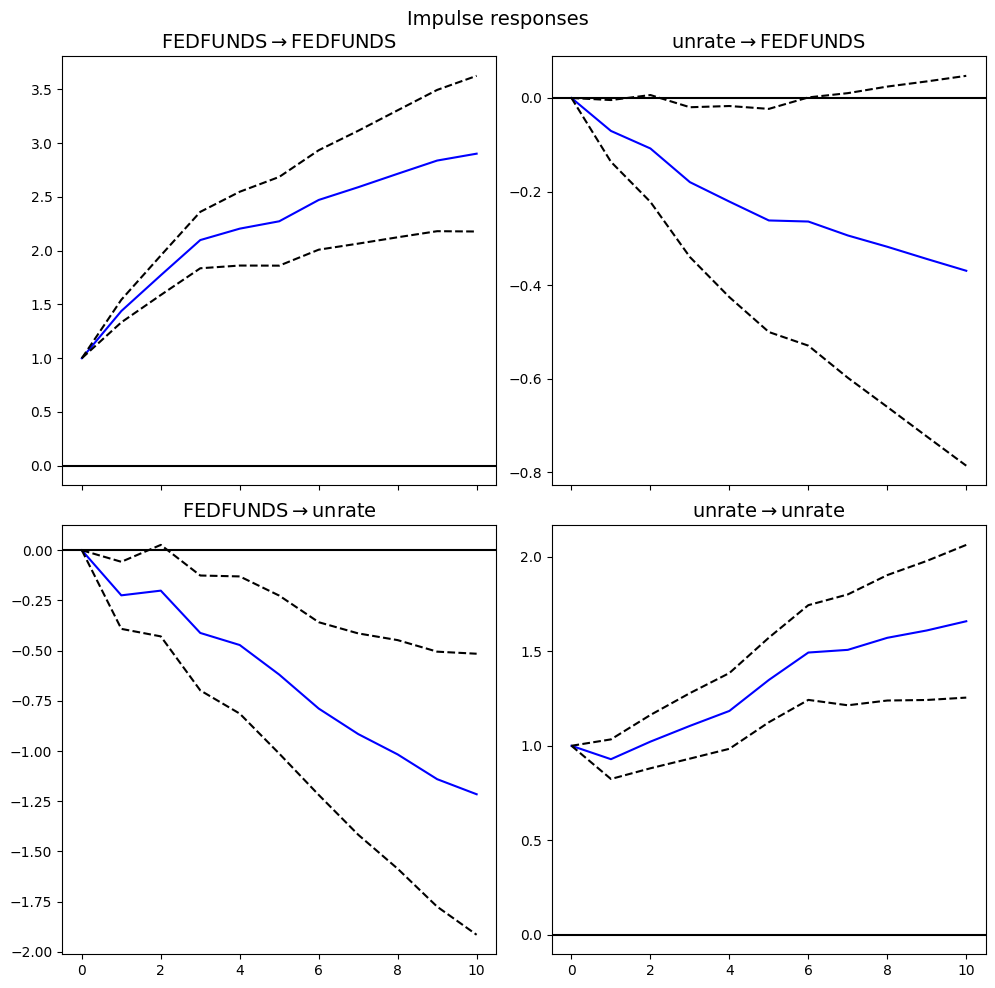

In [105]:
irf = results.irf()
fig = irf.plot(subplot_params= {'fontsize' : 14})
fig.tight_layout(); plt.show()

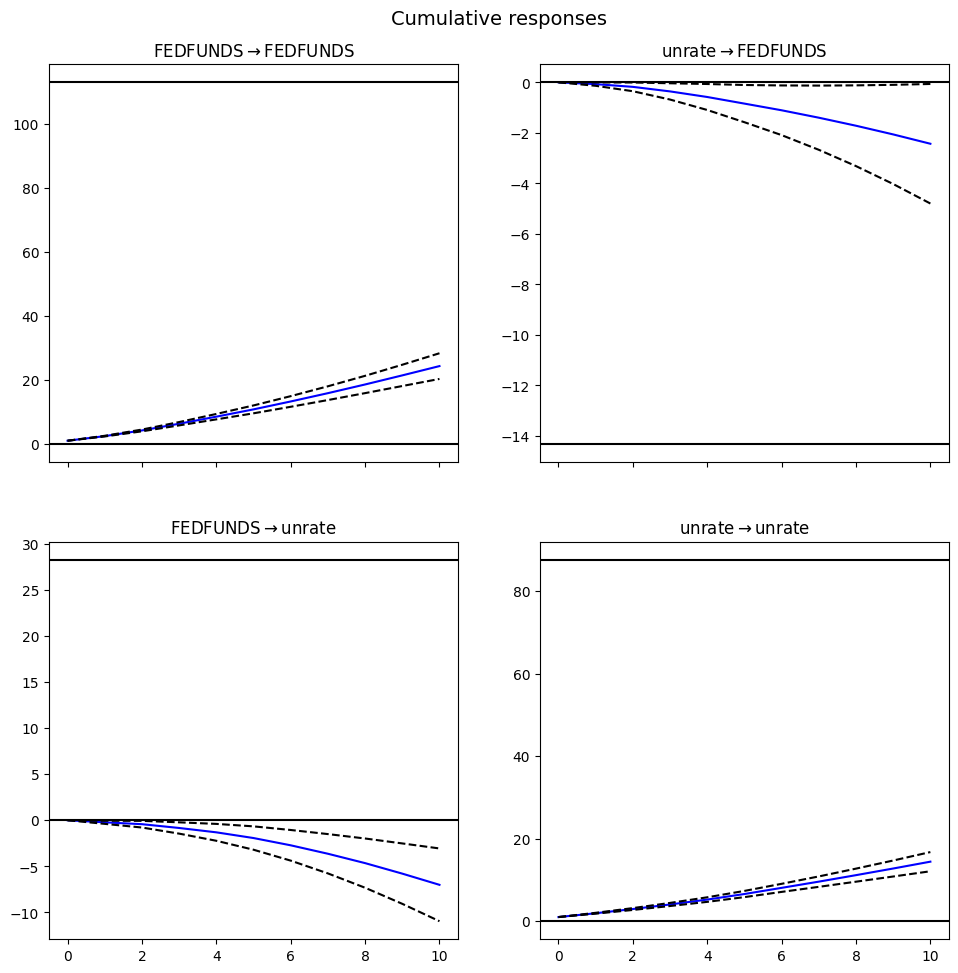

In [106]:
irf.plot_cum_effects(); plt.show()

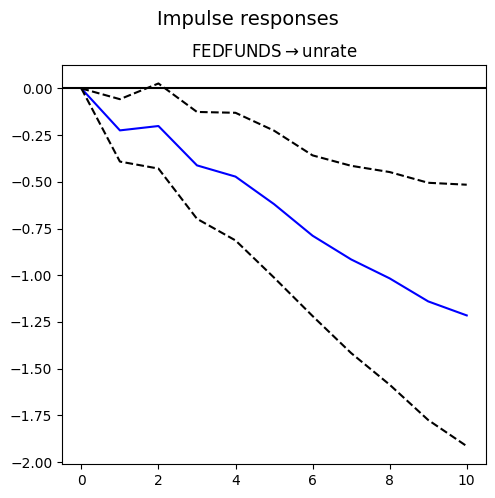

In [107]:
fig = irf.plot(impulse='FEDFUNDS', response='unrate', figsize=(5, 5))
fig.tight_layout(); plt.show()

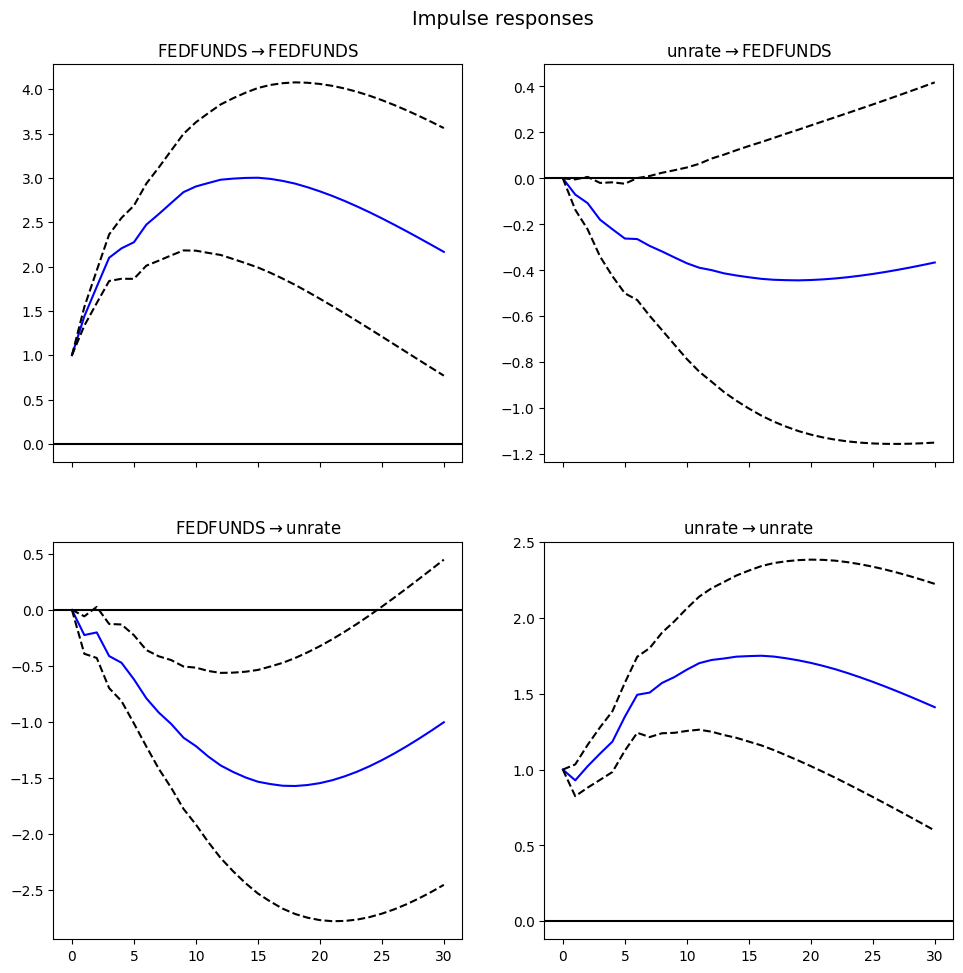

In [108]:
# Example changing lag value
irf = results.irf(30)
irf.plot();

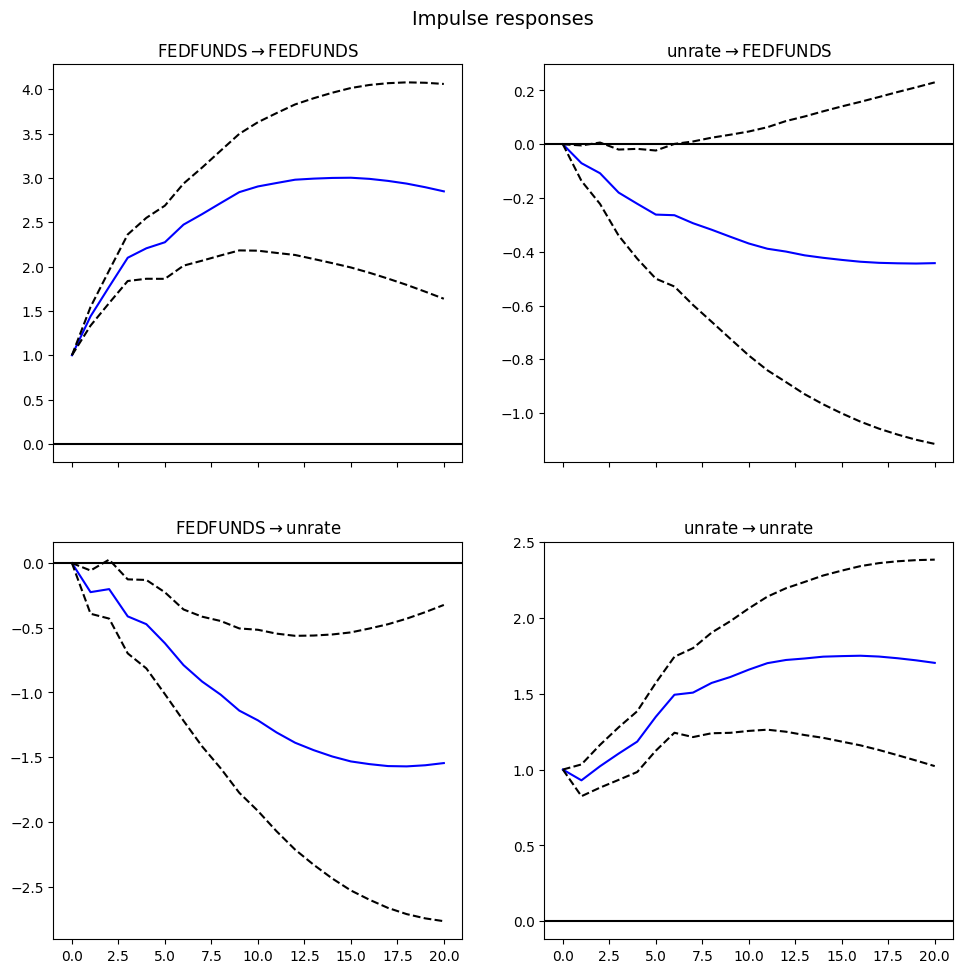

In [109]:
# Example changing lag value
irf = results.irf(20)
irf.plot(); plt.show()

In [110]:
fv = results.fevd()
fv.summary()

FEVD for FEDFUNDS
     FEDFUNDS    unrate
0    1.000000  0.000000
1    0.995945  0.004055
2    0.993300  0.006700
3    0.988495  0.011505
4    0.984269  0.015731
5    0.980043  0.019957
6    0.978191  0.021809
7    0.976237  0.023763
8    0.974467  0.025533
9    0.972762  0.027238

FEVD for unrate
     FEDFUNDS    unrate
0    0.000052  0.999948
1    0.009676  0.990324
2    0.011037  0.988963
3    0.022644  0.977356
4    0.031351  0.968649
5    0.042184  0.957816
6    0.055195  0.944805
7    0.069083  0.930917
8    0.081766  0.918234
9    0.094938  0.905062




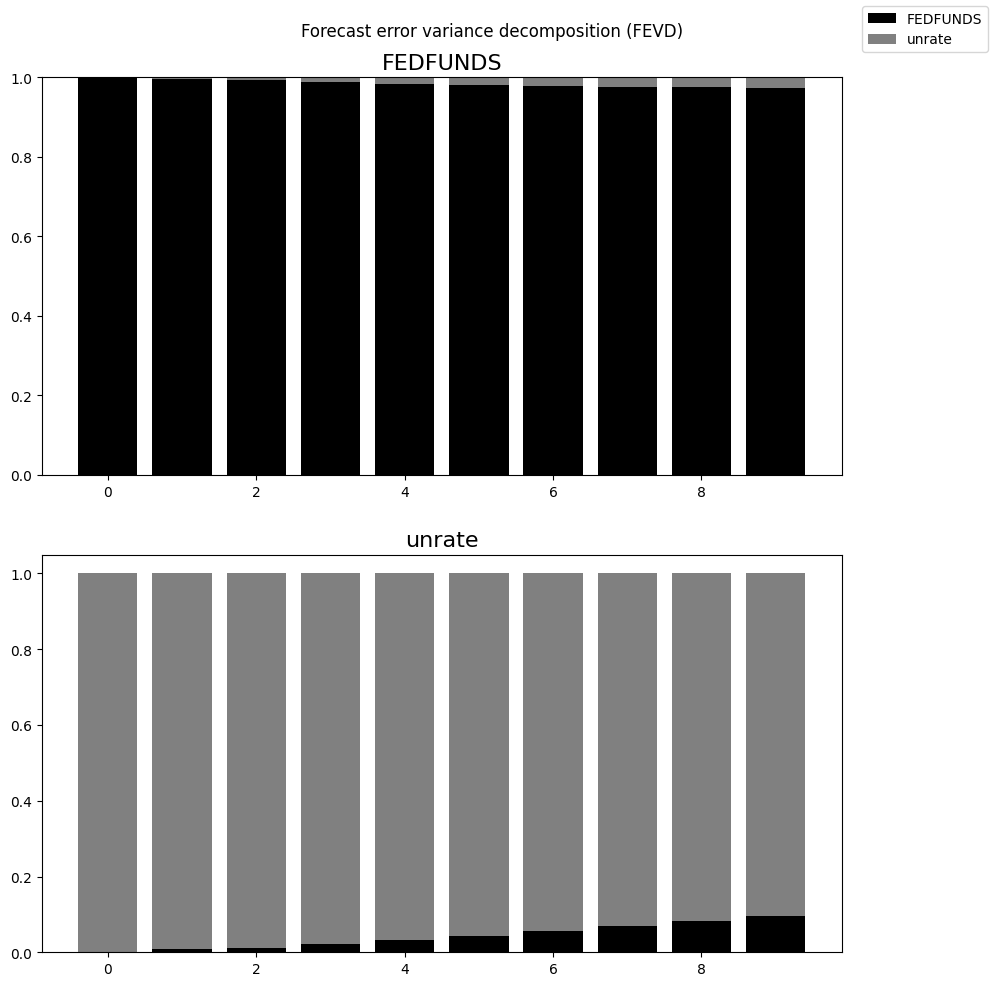

In [111]:
fv.plot(); plt.show()

In [112]:
results

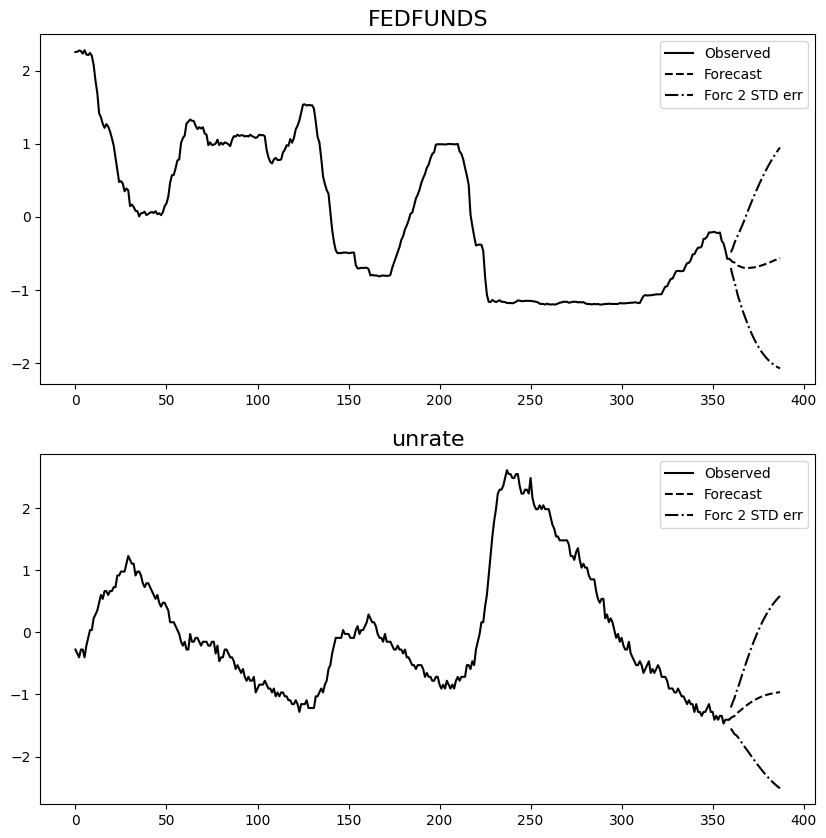

In [113]:
results.plot_forecast(n, plot_stderr=True);

# Recipe 5. Forecasting Volatility in Financial Time Series Data with GARCH

In this recipe, you will be using the arch library, which contains several volatility models, as well as financial econometrics tools. The library produces similar output to those from the statsmodels library. At the time of writing, the latest version is 5.1.0.


* To install arch using `pip`, use the following command:

In [114]:
!pip3 install -U arch

In [115]:
import arch
from arch import arch_model

In [116]:
msft = pd.read_csv('datasets/msft.csv', 
                   index_col='Date', 
                   parse_dates=True)
msft.head()

,close
Date,
2010-01-04,23.904985
2010-01-05,23.912710
2010-01-06,23.765955
2010-01-07,23.518789
2010-01-08,23.680998


In [117]:
msft['returns'] = 100 * msft.pct_change()
msft.dropna(inplace=True, how='any')
msft.head()

,close,returns
Date,,
2010-01-05,23.912710,0.032314
2010-01-06,23.765955,-0.613712
2010-01-07,23.518789,-1.039999
2010-01-08,23.680998,0.689698
2010-01-11,23.379765,-1.272046


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

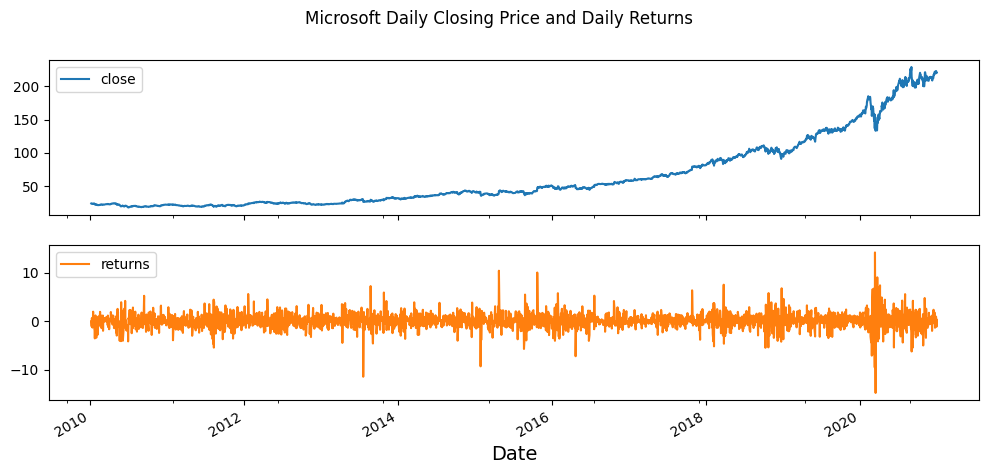

In [118]:
msft.plot(subplots=True, 
          title="Microsoft Daily Closing Price and Daily Returns")

In [119]:
# # fig, ax = plt.subplots(1,2, figsize=(20,3))
# plot_acf(msft['returns'], zero=False); plt.show()
# plot_pacf(msft['returns'], zero=False); plt.show()

In [120]:
# volatility = msft_return.std()
# volatility

In [121]:
# annualized = np.sqrt(252)*volatility
# annualized

In [122]:
# msft_return.rolling(22).apply(lambda x: x.std()*np.sqrt(252)).plot()

In [123]:
idx = round(len(msft) * 0.90)
train = msft.returns[:idx]
test = msft.returns[idx:]
print(f'Train: {train.shape}')
print(f'Test: {test.shape}')

Train: (2491,)
Test: (277,)


In [124]:
model = arch_model(train, 
                   p=1, q=1,
                   mean='Constant',
                   vol='GARCH',
                   dist='normal')

In [125]:
results = model.fit(update_freq=5)

Iteration:      5,   Func. Count:     36,   Neg. LLF: 4374.845453710037
Iteration:     10,   Func. Count:     62,   Neg. LLF: 4361.891627557763
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4361.891627557763
            Iterations: 11
            Function evaluations: 66
            Gradient evaluations: 11


In [126]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -4361.89
Distribution:                  Normal   AIC:                           8731.78
Method:            Maximum Likelihood   BIC:                           8755.07
                                        No. Observations:                 2491
Date:                Mon, Apr 17 2023   Df Residuals:                     2490
Time:                        15:50:52   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1156  2.702e-02      4.279  1.877e-05 [6.266e-02,  0.169]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.3594      0.127      2.836  4.574e-03   [  0.111,  0.608]
alpha[1]       0.1458  4.424e-02      3.294  9.861e-04 [5.904e-02,  0.232]
beta[1]        0.6912  8.177e-02      8.454  2.821e-17   [  0.531,  0.852]
==========================================================================

Covariance estimator: robust
"""

$\omega$, $\alpha$ and $\beta$ are estimated by Maximum Likelihood Method

In [127]:
results.params

mu          0.115615
omega       0.359401
alpha[1]    0.145750
beta[1]     0.691248
Name: params, dtype: float64

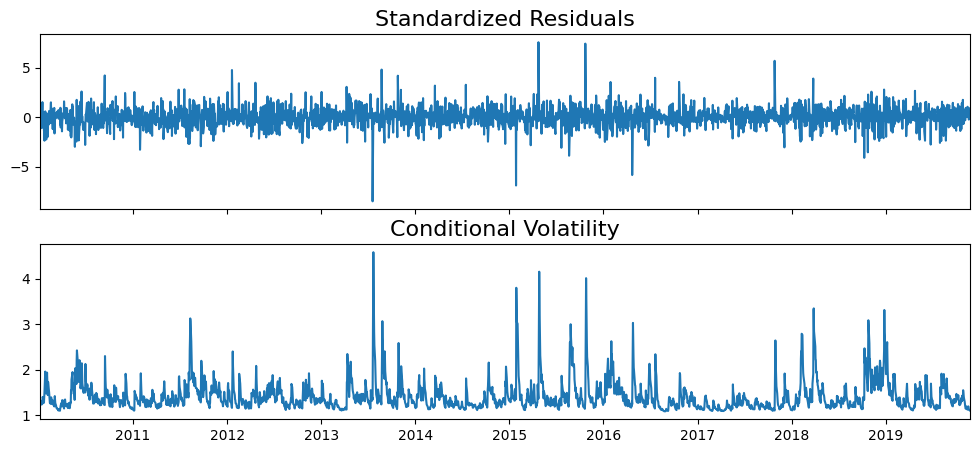

In [128]:
results.plot(); plt.show()

In [129]:
results.std_err

mu          0.027019
omega       0.126747
alpha[1]    0.044241
beta[1]     0.081768
Name: std_err, dtype: float64

Text(0.5, 1.0, 'Standardized Residuals')

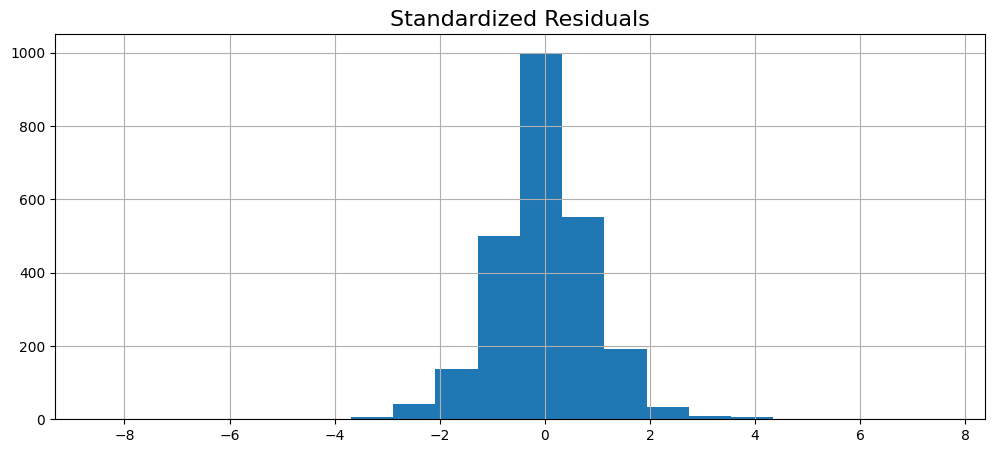

In [130]:
results.std_resid.hist(bins=20)
plt.title("Standardized Residuals")

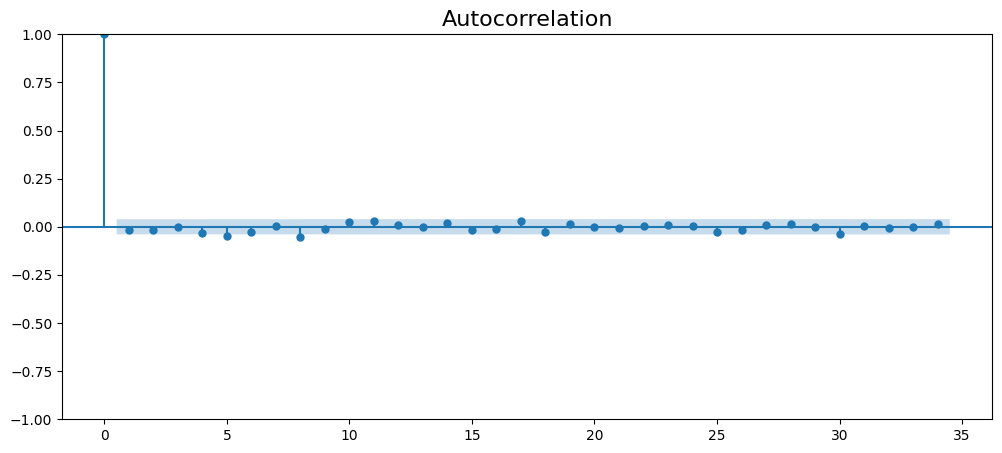

In [131]:
plot_acf(results.std_resid); plt.show()

In [132]:
from statsmodels.stats.diagnostic import acorr_ljungbox
acorr_ljungbox(results.std_resid, 
               lags=10, 
               return_df=True)['lb_pvalue']

1     0.396521
2     0.530357
3     0.735656
4     0.473760
5     0.087968
6     0.070935
7     0.109796
8     0.017272
9     0.025041
10    0.021833
Name: lb_pvalue, dtype: float64

In [133]:
msft_forecast = results.forecast(horizon=test.shape[0])

In [134]:
msft_forecast.variance[-1:]

,h.001,h.002,h.003,h.004,h.005,h.006,h.007,h.008,h.009,h.010,...,h.268,h.269,h.270,h.271,h.272,h.273,h.274,h.275,h.276,h.277
Date,,,,,,,,,,,,,,,,,,,,,
2019-11-25,1.341888,1.482559,1.600301,1.69885,1.781336,1.850377,1.908163,1.956531,1.997014,2.030899,...,2.204893,2.204893,2.204893,2.204893,2.204893,2.204893,2.204893,2.204893,2.204893,2.204893


In [135]:
msft_forecast.mean[-1:]

,h.001,h.002,h.003,h.004,h.005,h.006,h.007,h.008,h.009,h.010,...,h.268,h.269,h.270,h.271,h.272,h.273,h.274,h.275,h.276,h.277
Date,,,,,,,,,,,,,,,,,,,,,
2019-11-25,0.115615,0.115615,0.115615,0.115615,0.115615,0.115615,0.115615,0.115615,0.115615,0.115615,...,0.115615,0.115615,0.115615,0.115615,0.115615,0.115615,0.115615,0.115615,0.115615,0.115615


<Axes: xlabel='Date'>

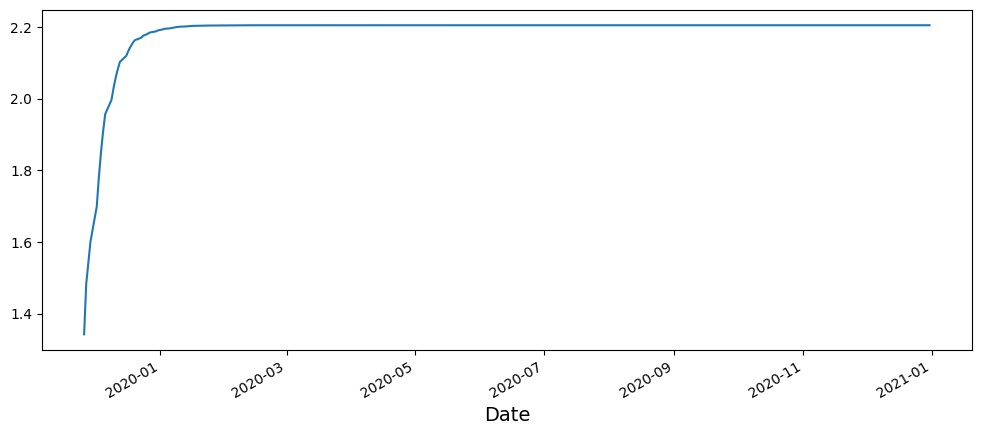

In [136]:
forecast = msft_forecast.variance[-1:]
pd.Series(forecast.values.ravel(), index=test.index).plot()

## There is more

In [137]:
model = arch_model(train, 
                   p=1, q=1,
                   mean='Zero',
                   vol='GARCH',
                   dist='normal')
results = model.fit(disp=False)

In [138]:
results.params

omega       0.345501
alpha[1]    0.130555
beta[1]     0.711339
Name: params, dtype: float64

In [139]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -4371.30
Distribution:                  Normal   AIC:                           8748.59
Method:            Maximum Likelihood   BIC:                           8766.06
                                        No. Observations:                 2491
Date:                Mon, Apr 17 2023   Df Residuals:                     2491
Time:                        15:50:57   Df Model:                            0
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.3455      0.127      2.717  6.594e-03 [9.624e-02,  0.595]
alpha[1]       0.1306  3.998e-02      3.266  1.091e-03 [5.220e-02,  0.209]
beta[1]        0.7113  8.038e-02      8.850  8.787e-19   [  0.554,  0.869]
==========================================================================

Covariance estimator: robust
"""

In [140]:
msft_forecast = results.forecast(horizon=test.shape[0])
msft_forecast.mean[-1:]

,h.001,h.002,h.003,h.004,h.005,h.006,h.007,h.008,h.009,h.010,...,h.268,h.269,h.270,h.271,h.272,h.273,h.274,h.275,h.276,h.277
Date,,,,,,,,,,,,,,,,,,,,,
2019-11-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [141]:
model = arch_model(train, 
                   p=1, q=1,
                   mean='LS', lags=1,
                   vol='GARCH',
                   dist='normal')
results = model.fit(disp=False)
results.params

Const       0.115615
omega       0.359401
alpha[1]    0.145750
beta[1]     0.691248
Name: params, dtype: float64

In [142]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Least Squares - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Least Squares   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -4361.89
Distribution:                  Normal   AIC:                           8731.78
Method:            Maximum Likelihood   BIC:                           8755.07
                                        No. Observations:                 2491
Date:                Mon, Apr 17 2023   Df Residuals:                     2490
Time:                        15:50:59   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
Const          0.1156  2.702e-02      4.279  1.877e-05 [6.266e-02,  0.169]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.3594      0.127      2.836  4.574e-03   [  0.111,  0.608]
alpha[1]       0.1458  4.424e-02      3.294  9.861e-04 [5.904e-02,  0.232]
beta[1]        0.6912  8.177e-02      8.454  2.821e-17   [  0.531,  0.852]
==========================================================================

Covariance estimator: robust
"""

In [143]:
results.model

Least Squares(constant: yes, lags: none, no. of exog: 0, volatility: GARCH(p: 1, q: 1), distribution: Normal distribution), id: 0x7fd0a41bd850